# Exploratory Data Analysis

See 'Notebooks/Data_Cleaning.ipynb' for data cleaning. Raw data imported from square.com was cleaned and some relevant features impacting the sales, such as weather and social media, were added.

- Creation of secondary dataframes
- Daily info
- Sales of products

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
#importing cleaned data
sales_data = pd.read_csv('data/square/export/sales_data_clean.csv')
sales_data = sales_data.drop('Unnamed: 0', axis='columns')
sales_data['date'] = pd.to_datetime(sales_data['date'])

In [3]:
sales_data.select_dtypes(include=[np.number]).columns

Index(['month', 'day', 'year', 'hour', 'unit_price', 'count', 'gross_sales',
       'customer_id_no', 'transaction_no', 'visit_freq', 'daily_no_customers',
       'no_styles_sold', 'precipitation', 'snowfall', 'max_temp', 'min_temp',
       'beer_abv', 'beer_ibu', 'global_rating', 'rating_count', 'insta_post'],
      dtype='object')

In [4]:
descript_data = sales_data.select_dtypes(include=[np.number]).drop(['month','day','year','hour','customer_id_no','transaction_no'], axis = 'columns')

In [5]:
#descriptive statistics summary
descript_data.describe()

unit_price         count   gross_sales    visit_freq  \
count  70514.000000  70514.000000  70514.000000  70514.000000   
mean       9.745985      1.145375     11.389847   1946.514678   
std       11.885548      0.504525     19.263721   3442.584941   
min       -0.000000     -4.000000   -160.000000      1.000000   
25%        6.000000      1.000000      7.000000      2.000000   
50%        7.000000      1.000000      8.000000     16.000000   
75%        8.000000      1.000000     12.000000    261.000000   
max      600.000000     35.000000   1050.000000   8156.000000   

       daily_no_customers  no_styles_sold  precipitation      snowfall  \
count        70514.000000    70514.000000   70514.000000  70514.000000   
mean            40.379726       12.216269       0.125858      0.123848   
std             30.329769        2.824990       0.329730      0.849779   
min              1.000000        1.000000       0.000000      0.000000   
25%             21.000000       10.000000       0.000000      0.000000   
50%             32.000000       13.000000       0.000000      0.000000   
75%             50.000000       14.000000       0.060000      0.000000   
max            189.000000       18.000000       3.270000     15.700000   

           max_temp      min_temp      beer_abv      beer_ibu  global_rating  \
count  70514.000000  70514.000000  70514.000000  70514.000000   70514.000000   
mean      57.046076     39.660904      5.635766     21.247114       3.095308   
std       18.636715     17.206291      2.492625     25.794622       1.438502   
min       13.000000    -14.000000      0.000000      0.000000       0.000000   
25%       41.000000     26.000000      5.000000      0.000000       3.610000   
50%       56.000000     39.000000      5.800000     20.000000       3.700000   
75%       72.000000     54.000000      7.000000     33.000000       3.860000   
max       99.000000     75.000000      9.100000    105.000000       4.240000   

       rating_count    insta_post  
count  70514.000000  70514.000000  
mean     220.920456      0.432169  
std      263.894235      0.495381  
min        0.000000      0.000000  
25%       20.000000      0.000000  
50%      162.000000      0.000000  
75%      257.000000      1.000000  
max      907.000000      1.000000

# Creation of secondary dataframes

In [6]:
# Remove any non-beer transactions
sales_data_beer = sales_data[sales_data['beer_style'] != 'None']
sales_data_beer.head()

date    weekday month_name  month  day  year  hour          item  \
0 2019-01-02  Wednesday    January      1    2  2019    17    Pale 12oz.   
1 2019-01-02  Wednesday    January      1    2  2019    18    Pale 12oz.   
2 2019-01-02  Wednesday    January      1    2  2019    18    Pale 12oz.   
3 2019-01-02  Wednesday    January      1    2  2019    19  Tripel 12oz.   
4 2019-01-02  Wednesday    January      1    2  2019    19  Tripel 12oz.   

       beer_style product_type  ...  max_temp  min_temp  primary_beer_type  \
0             APA        Draft  ...        34        24                Ale   
1             APA        Draft  ...        34        24                Ale   
2             APA        Draft  ...        34        24                Ale   
3  Belgian Tripel        Draft  ...        34        24              Other   
4  Belgian Tripel        Draft  ...        34        24              Other   

  beer_abv beer_ibu  global_rating  rating_count  date_added  insta_post  \
0      5.9     43.0           3.64           431  2015-09-05           0   
1      5.9     43.0           3.64           431  2015-09-05           0   
2      5.9     43.0           3.64           431  2015-09-05           0   
3      8.5     27.0           3.87           243  2017-11-11           0   
4      8.5     27.0           3.87           243  2017-11-11           0   

   insta_post_type  
0          No Post  
1          No Post  
2          No Post  
3          No Post  
4          No Post  

[5 rows x 32 columns]

In [7]:
# Remove any cash transactions as the customers cannot be tracked
sales_data_trackable = sales_data[sales_data['customer_id_no'] != -1]
sales_data_trackable.head()

date    weekday month_name  month  day  year  hour            item  \
1 2019-01-02  Wednesday    January      1    2  2019    18      Pale 12oz.   
2 2019-01-02  Wednesday    January      1    2  2019    18      Pale 12oz.   
3 2019-01-02  Wednesday    January      1    2  2019    19    Tripel 12oz.   
4 2019-01-02  Wednesday    January      1    2  2019    19    Tripel 12oz.   
8 2019-01-02  Wednesday    January      1    2  2019    19  Brut IPA 12oz.   

       beer_style product_type  ...  max_temp  min_temp  primary_beer_type  \
1             APA        Draft  ...        34        24                Ale   
2             APA        Draft  ...        34        24                Ale   
3  Belgian Tripel        Draft  ...        34        24              Other   
4  Belgian Tripel        Draft  ...        34        24              Other   
8        Brut IPA        Draft  ...        34        24                IPA   

  beer_abv beer_ibu  global_rating  rating_count  date_added  insta_post  \
1      5.9     43.0           3.64           431  2015-09-05           0   
2      5.9     43.0           3.64           431  2015-09-05           0   
3      8.5     27.0           3.87           243  2017-11-11           0   
4      8.5     27.0           3.87           243  2017-11-11           0   
8      6.1     21.0           3.63           143  2018-12-29           0   

   insta_post_type  
1          No Post  
2          No Post  
3          No Post  
4          No Post  
8          No Post  

[5 rows x 32 columns]

In [8]:
# Group by date
daily_grouped = sales_data.groupby(['date','weekday']).agg({'daily_no_customers':'max',
                                                 'no_styles_sold':'max',
                                                 'gross_sales': 'sum'}).reset_index()

In [9]:
daily_grouped[['gross_sales', 'daily_no_customers', 'no_styles_sold']].describe()

gross_sales  daily_no_customers  no_styles_sold
count  1077.000000         1077.000000     1077.000000
mean    745.722971           23.669452       10.306407
std     587.431710           20.745007        3.952187
min       5.000000            1.000000        1.000000
25%     319.000000           11.000000        8.000000
50%     600.000000           19.000000       11.000000
75%     977.000000           31.000000       13.000000
max    3926.000000          189.000000       18.000000

In [10]:
daily_grouped.head()

date    weekday  daily_no_customers  no_styles_sold  gross_sales
0 2019-01-02  Wednesday                   7               5        140.0
1 2019-01-03   Thursday                  14               6        488.0
2 2019-01-04     Friday                  28               7        704.0
3 2019-01-05   Saturday                  54               7       1112.5
4 2019-01-06     Sunday                  18               6        417.0

# Daily info
### Initialize plots

In [11]:
day_dict = {'Sunday':0, 'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6}
daily_grouped['day_id'] = daily_grouped['weekday'].map(day_dict)
custom_palette = sns.color_palette("Blues")
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

### Sales by day of the week

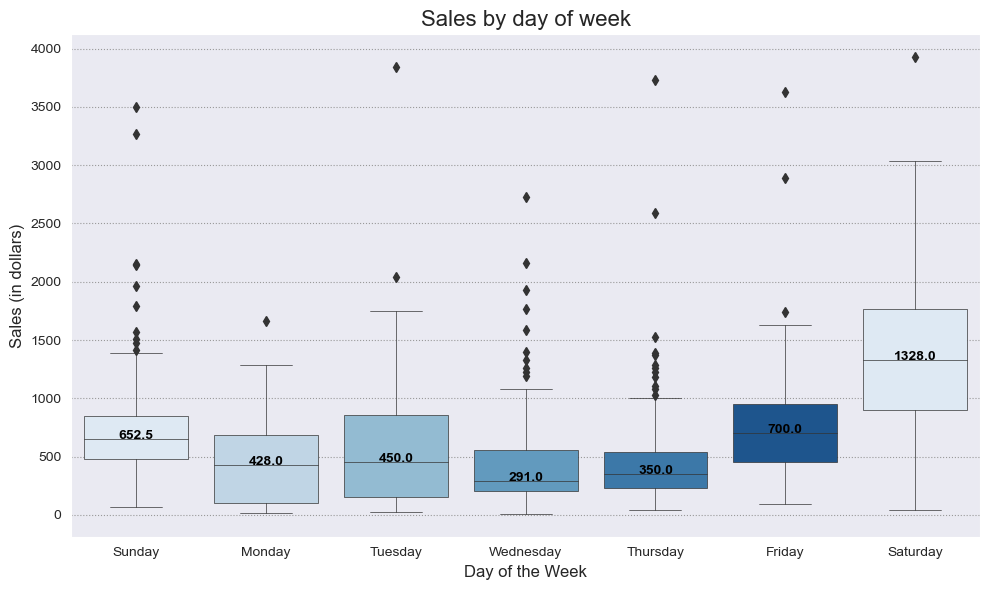

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data = daily_grouped, x = 'weekday', y='gross_sales', order = day_dict.keys(), palette=custom_palette, linewidth = 0.5)
plt.title('Sales by day of week', fontsize = 16)
plt.xlabel('Day of the Week', fontsize = 12)
plt.ylabel('Sales (in dollars)', fontsize = 12)

medians = daily_grouped.groupby(['day_id','weekday'])['gross_sales'].median()

for i, median in enumerate(medians):
    plt.text(i, median, f"{median}", horizontalalignment='center', color='black', weight='bold')
plt.tight_layout()
# plt.savefig('plot/sales_by_weekday.png',bbox_inches='tight')
# See project/folder/plots
plt.show()

### Customer count by day of week

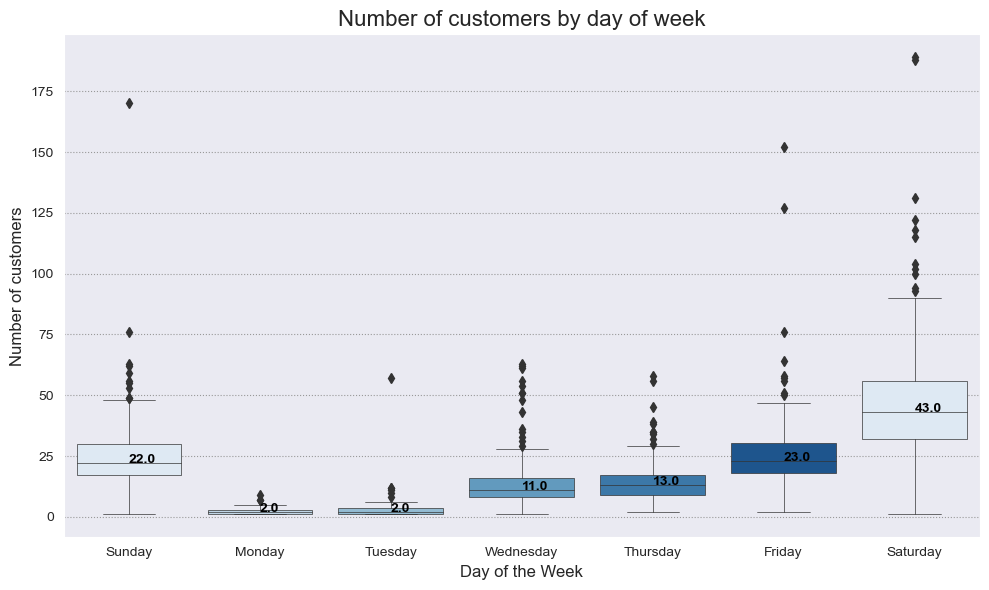

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data = daily_grouped, x = 'weekday', y='daily_no_customers', order = day_dict.keys(), palette=custom_palette, linewidth = 0.5)
plt.title('Number of customers by day of week', fontsize = 16)
plt.xlabel('Day of the Week', fontsize = 12)
plt.ylabel('Number of customers', fontsize = 12)

medians = daily_grouped.groupby(['day_id','weekday'])['daily_no_customers'].median()

for i, median in enumerate(medians):
    plt.text(i, median, f"{median}", horizontalalignment='left', color='black', weight='bold')
plt.tight_layout()

plt.show()

### Distribution of daily gross_sales

In [14]:
max_daily_sale = daily_grouped['gross_sales'].max()
max_daily_sale

3926.0

<Figure size 1000x500 with 0 Axes>

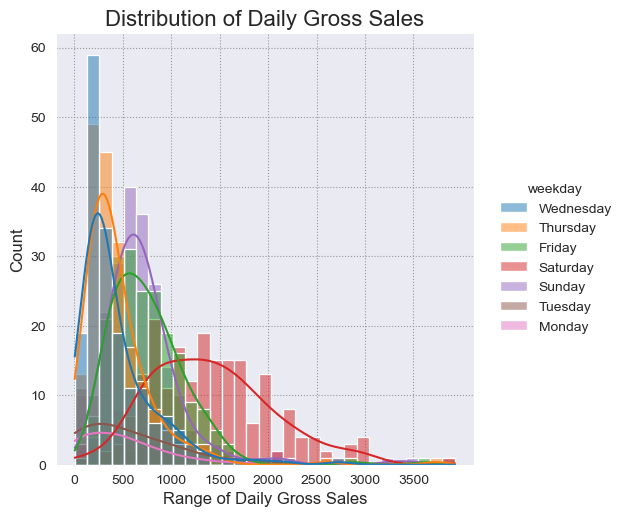

In [15]:
plt.figure(figsize=(10, 5))
sns.displot(data = daily_grouped, x='gross_sales', hue='weekday', kde=True)
plt.title('Distribution of Daily Gross Sales', fontsize = 16)
plt.xlabel('Range of Daily Gross Sales', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xticks(np.arange(0, max_daily_sale, 500))
plt.show()

# Sales of products

### Sales by product type daily

In [16]:
daily_grouped_type = sales_data[sales_data['year']==2023].groupby(['date','weekday','product_type']).agg({'gross_sales':'sum'}).reset_index() #sum gross sales daily by date
daily_grouped_type_df = daily_grouped_type.groupby(['weekday', 'product_type']).agg({'gross_sales':'mean'}).reset_index() #average gross sales by weekday
daily_grouped_type_df['day_id'] = daily_grouped_type_df['weekday'].map(day_dict)

daily_grouped_type_df.head()

weekday product_type  gross_sales  day_id
0  Friday          Can   109.400000       5
1  Friday        Draft   236.823529       5
2  Friday      Growler    21.000000       5
3  Friday          Keg   810.000000       5
4  Friday        Other    26.846154       5

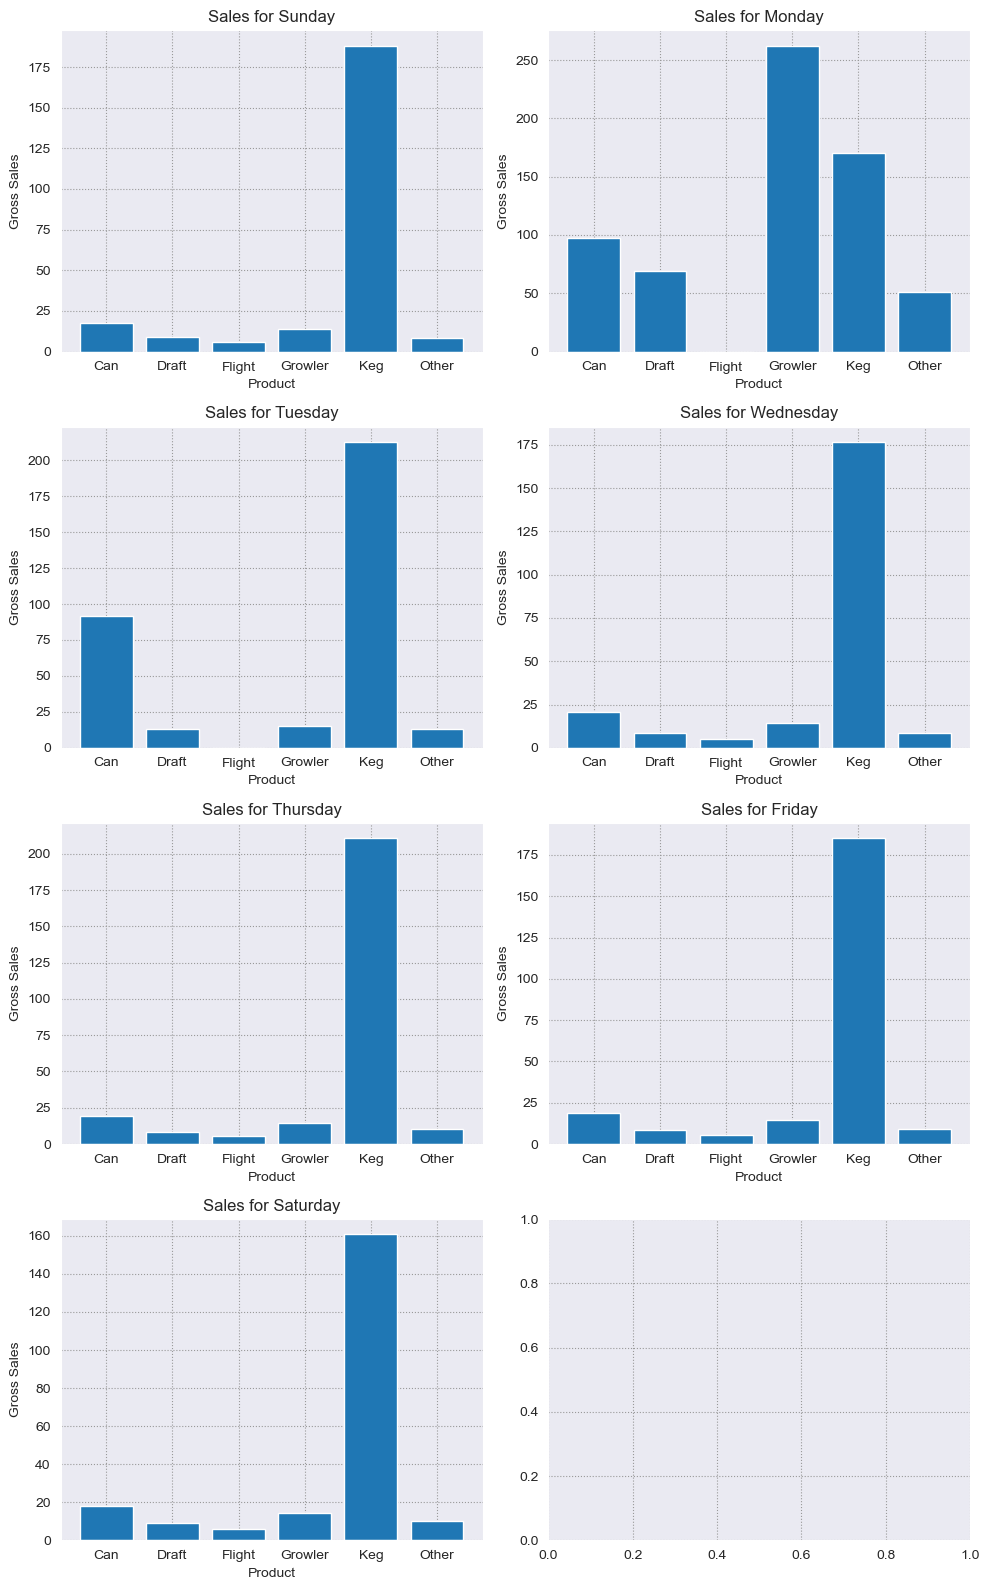

In [17]:
daily_grouped_type = sales_data.groupby(['product_type', 'weekday'])['gross_sales'].mean().reset_index()
unique_products = daily_grouped_type['product_type'].unique()

days_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

num_cols = 2
num_rows = int(round(len(day_dict.keys()) / num_cols, 0))

fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 4 * num_rows))
axs = axs.flatten()

for i, day in enumerate(day_dict.keys()):
    ax = axs[i] if num_rows > 1 else axs
    product_data = daily_grouped_type[daily_grouped_type['weekday'] == day]
    
    # Initialize sales for each prod to 0
    sales_per_day = {prod: 0 for prod in unique_products}
    
    for product, sales in zip(product_data['product_type'], product_data['gross_sales']):
        sales_per_day[product] = sales
    
    ax.bar(sales_per_day.keys(), sales_per_day.values())
    ax.set_title(f"Sales for {day}")
    ax.set_xlabel("Product")
    ax.set_ylabel("Gross Sales")

plt.tight_layout()
plt.show()


### Sales by product type monthly

In [18]:
monthly_grouped_type = sales_data.groupby(['year','month','product_type']).agg({'gross_sales':'sum'}).reset_index() #sum gross sales monthly by date
monthly_grouped_type_df = monthly_grouped_type.groupby(['month', 'product_type']).agg({'gross_sales':'mean'}).reset_index() #average gross sales by month
monthly_grouped_type_df

month product_type  gross_sales
0       1          Can    2423.0000
1       1        Draft    9685.2000
2       1       Flight      31.5000
3       1      Growler     984.4000
4       1          Keg    1983.0000
..    ...          ...          ...
67     12        Draft    8683.7500
68     12       Flight      12.0000
69     12      Growler    1762.5000
70     12          Keg    1508.7500
71     12        Other    1151.1425

[72 rows x 3 columns]

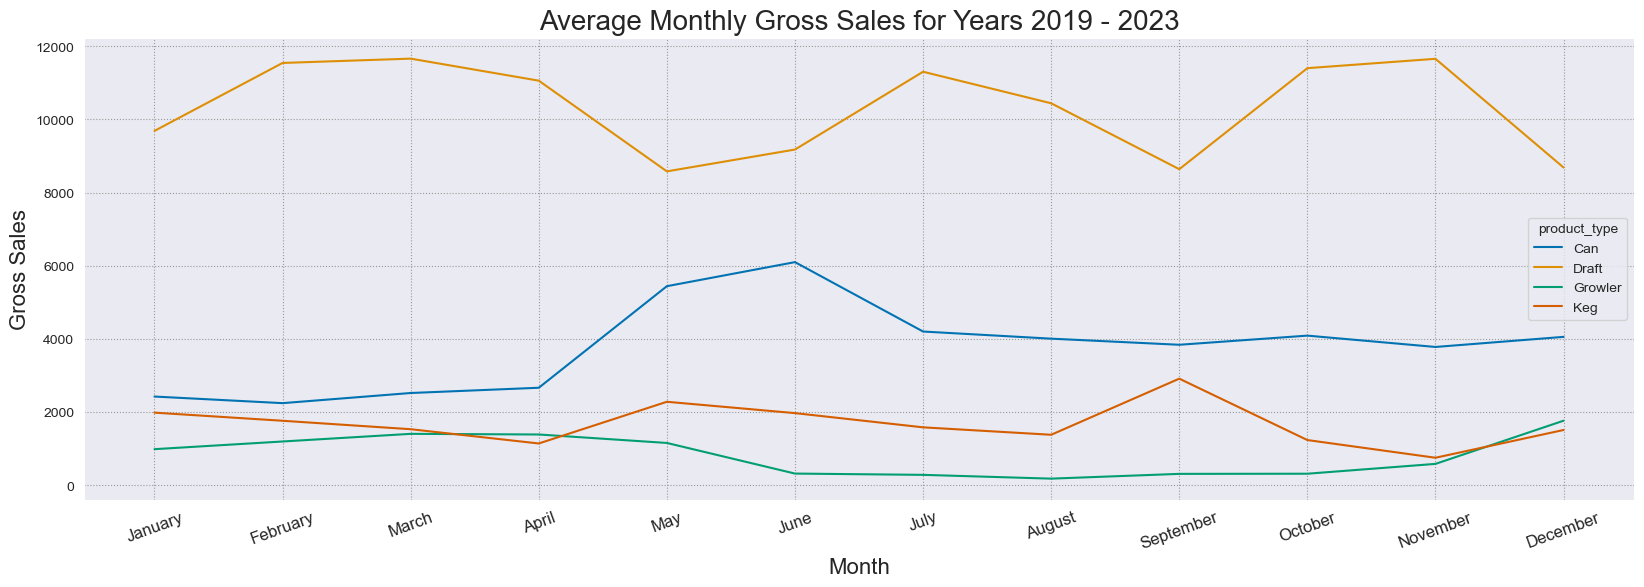

In [19]:
monthly_sales_2019 = monthly_grouped_type_df[monthly_grouped_type_df['product_type'].isin(['Can','Draft','Growler','Keg'])]
monthly_sales_2019 = pd.DataFrame(monthly_sales_2019)

fig = plt.figure(figsize=(20, 6))
sns.lineplot(data=monthly_sales_2019, x = 'month', y = 'gross_sales', hue='product_type', errorbar=None, palette = 'colorblind')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=20, fontsize=12)
plt.title('Average Monthly Gross Sales for Years 2019 - 2023', fontsize=20)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Gross Sales', fontsize=16)
plt.show()

### Sales by product type yearly

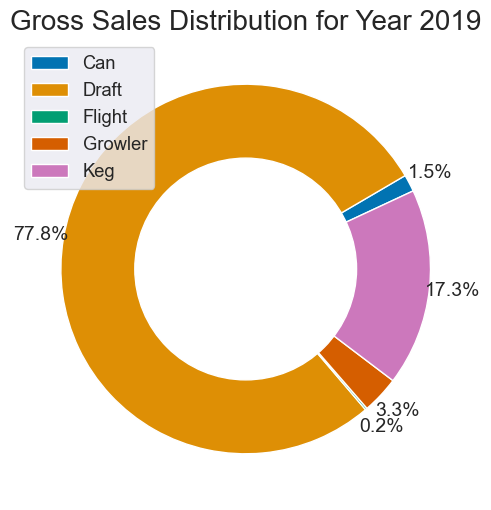

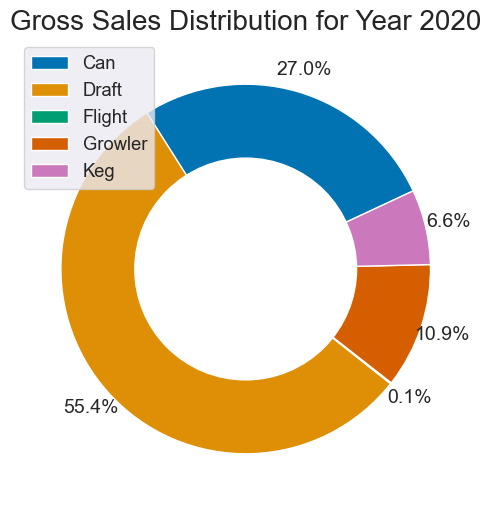

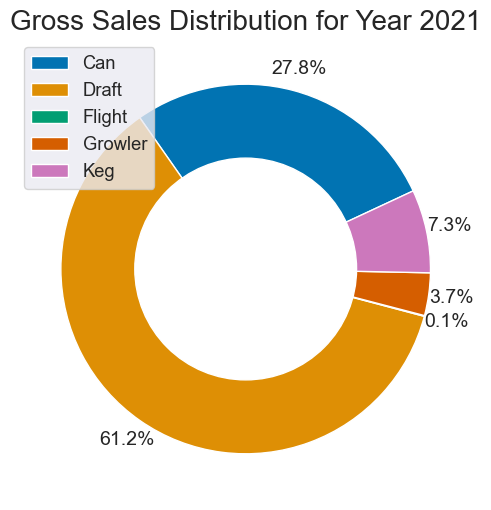

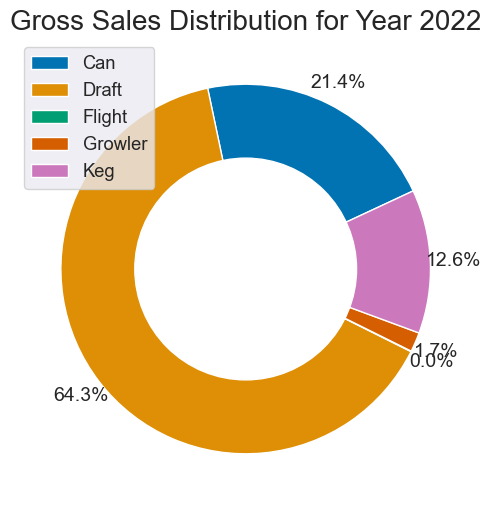

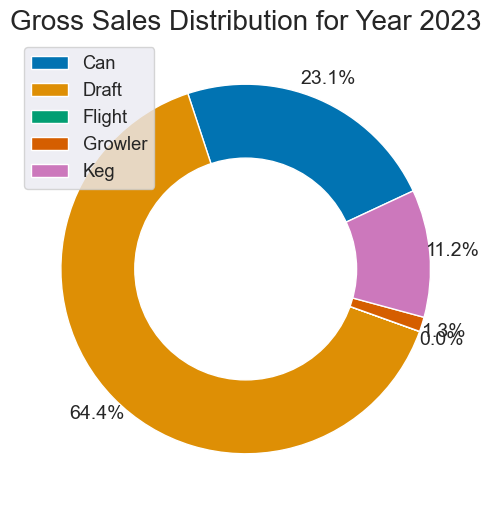

In [20]:
product_sales = sales_data_beer.groupby(['year','product_type']).agg({'gross_sales':'sum'})
product_sales = pd.DataFrame(product_sales).reset_index()
product_sales = product_sales[product_sales['product_type']!='Other']
grouped_sales = product_sales.groupby('year')

for year, group in grouped_sales:
    sales_by_product_type = group.groupby('product_type')['gross_sales'].sum()
    sns.set(font_scale = 1.2)
    sns.set_palette('colorblind')

    plt.figure(figsize=(8, 6))
    plt.title(f'Gross Sales Distribution for Year {year}', fontsize=20)
    plt.pie(sales_by_product_type, labels=sales_by_product_type.index, autopct='%1.1f%%', startangle=25,
            pctdistance=1.125, labeldistance=None, textprops={'fontsize':14})
    centre_circle = plt.Circle((0,0),0.6,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.legend(loc='upper left')
    plt.show()

### Yearly sales by beer style

In [21]:
style_sales = sales_data_beer[(sales_data_beer['beer_style'] != 'Seltzer')&(sales_data_beer['beer_style'] != 'Flight')
                              &(sales_data_beer['beer_style'] != 'Mixed')&(sales_data_beer['beer_style'] != 'Growler')]
style_sales= style_sales.groupby(['year','beer_style']).agg({'gross_sales':'sum'})
style_sales = pd.DataFrame(style_sales).reset_index()

style_ratings = sales_data_beer[(sales_data_beer['beer_style'] != 'Seltzer')&(sales_data_beer['beer_style'] != 'Flight')
                                &(sales_data_beer['beer_style'] != 'Mixed')&(sales_data_beer['beer_style'] != 'Growler')]
style_ratings= style_ratings.groupby(['beer_style']).agg({'global_rating':'mean','rating_count':'max'})
style_ratings = pd.DataFrame(style_ratings).reset_index()
style_ratings = style_ratings.sort_values('global_rating', ascending=True)

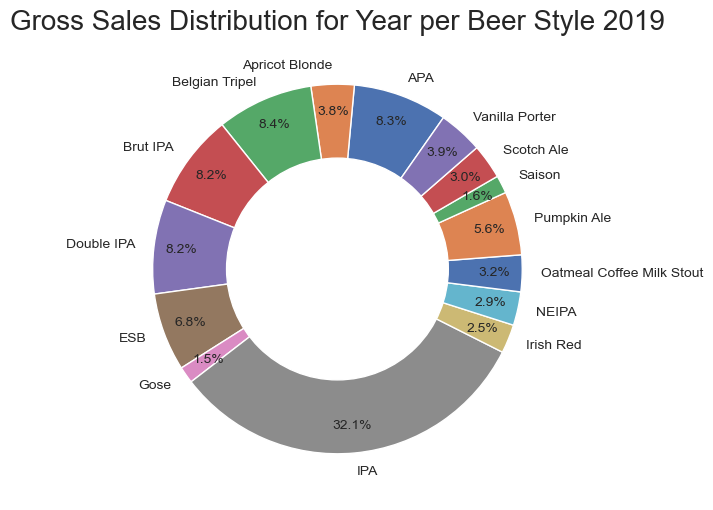

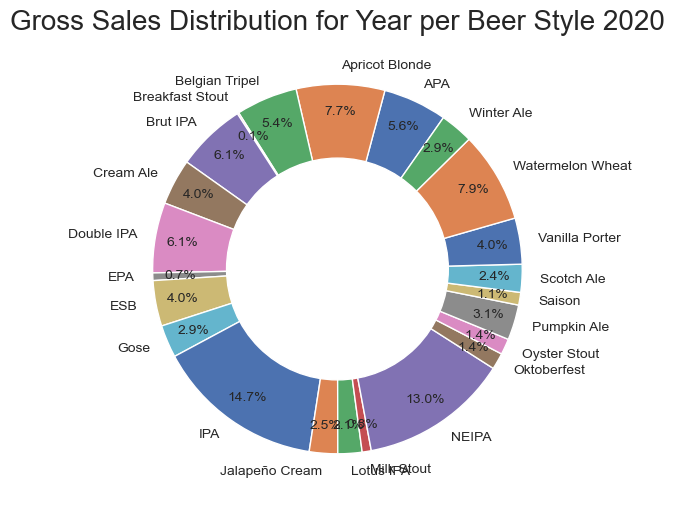

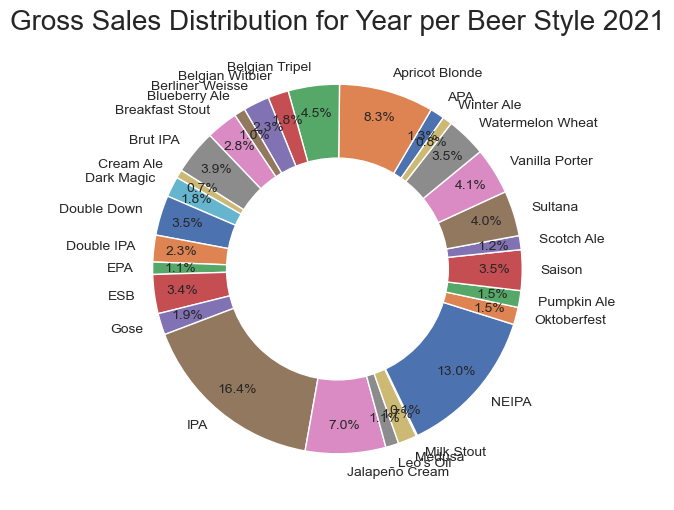

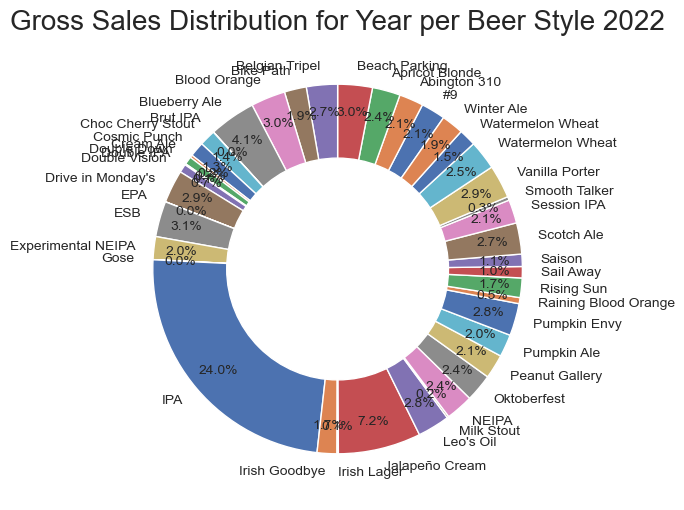

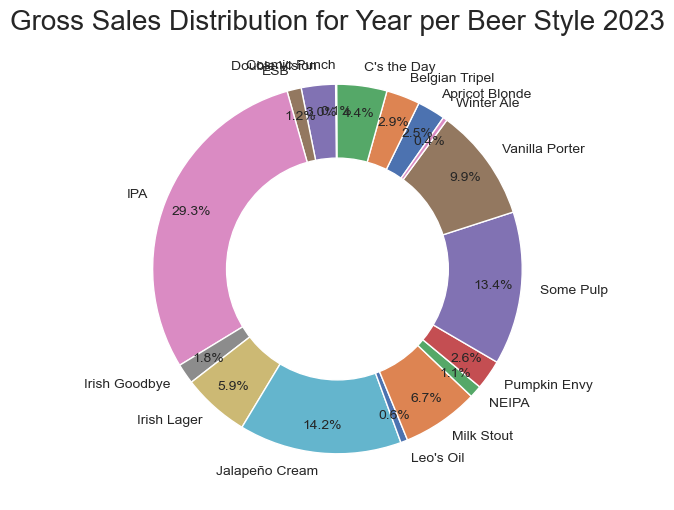

In [22]:
grouped_styles = style_sales.groupby('year')
for year, group in grouped_styles:
    sales_by_style = group.groupby('beer_style')['gross_sales'].sum()
    sns.set(font_scale = 1.1)

    plt.figure(figsize=(8, 6)) 
    plt.title(f'Gross Sales Distribution for Year per Beer Style {year}', fontsize=20)
    plt.pie(sales_by_style, labels=sales_by_style.index, autopct='%1.1f%%', startangle=55, pctdistance=0.85, textprops={'fontsize':10})   
    centre_circle = plt.Circle((0,0),0.6,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.xticks(rotation=45)
    plt.show()

### Yearly sales by primary style

In [23]:
primary_sales= sales_data_beer.groupby(['year','primary_beer_type']).agg({'gross_sales':'sum'})
primary_sales = pd.DataFrame(primary_sales).reset_index()
primary_sales = primary_sales[primary_sales['primary_beer_type'] != 'None']

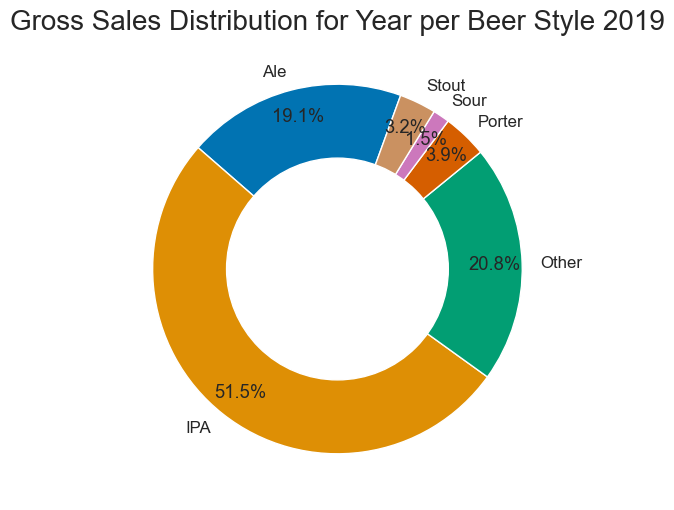

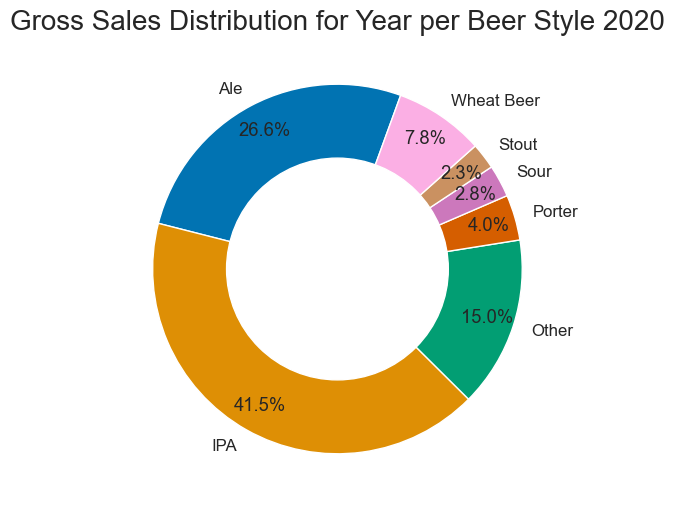

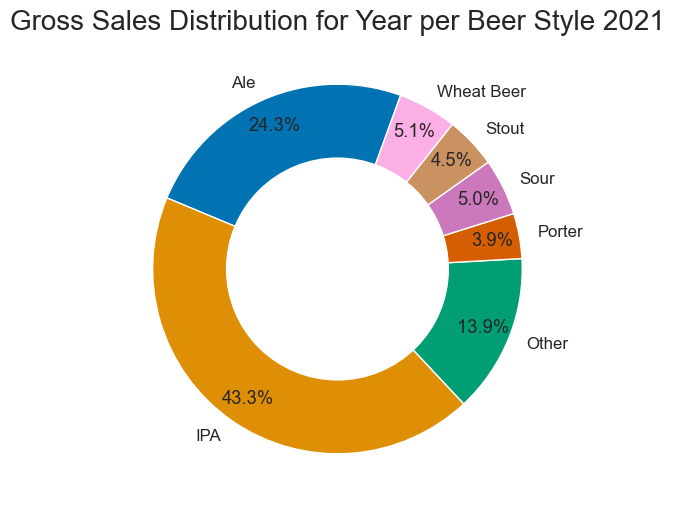

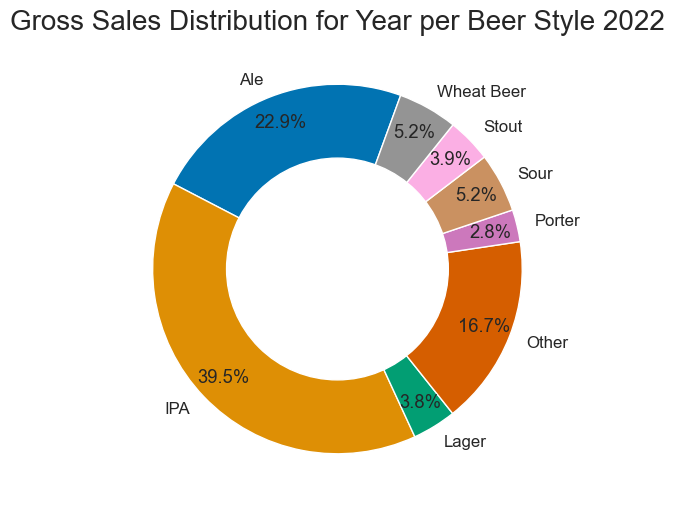

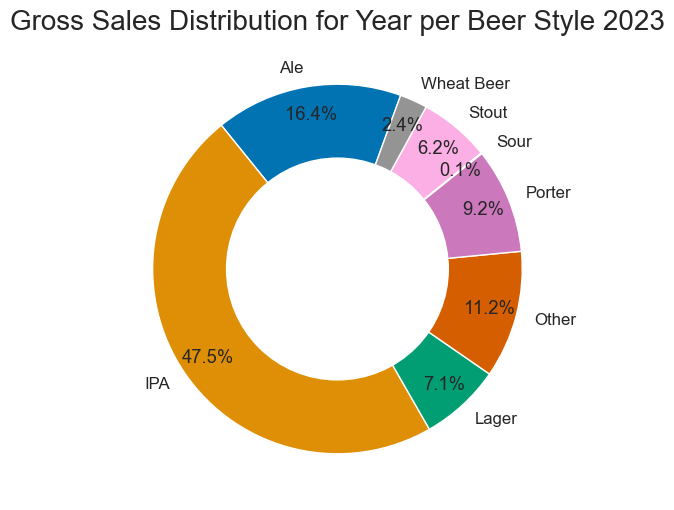

In [24]:
grouped_styles = primary_sales.groupby('year')
for year, group in grouped_styles:
    sales_by_primary_style = group.groupby('primary_beer_type')['gross_sales'].sum()
    sns.set(font_scale = 1.1)
    sns.set_palette('colorblind')
    plt.figure(figsize=(8, 6)) 
    plt.title(f'Gross Sales Distribution for Year per Beer Style {year}', fontsize=20)
    plt.pie(sales_by_primary_style, labels=sales_by_primary_style.index, autopct='%1.1f%%', startangle=70, pctdistance=0.85)  
    centre_circle = plt.Circle((0,0),0.6,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.xticks(rotation=45)
    plt.show()

### Number of available styles over time

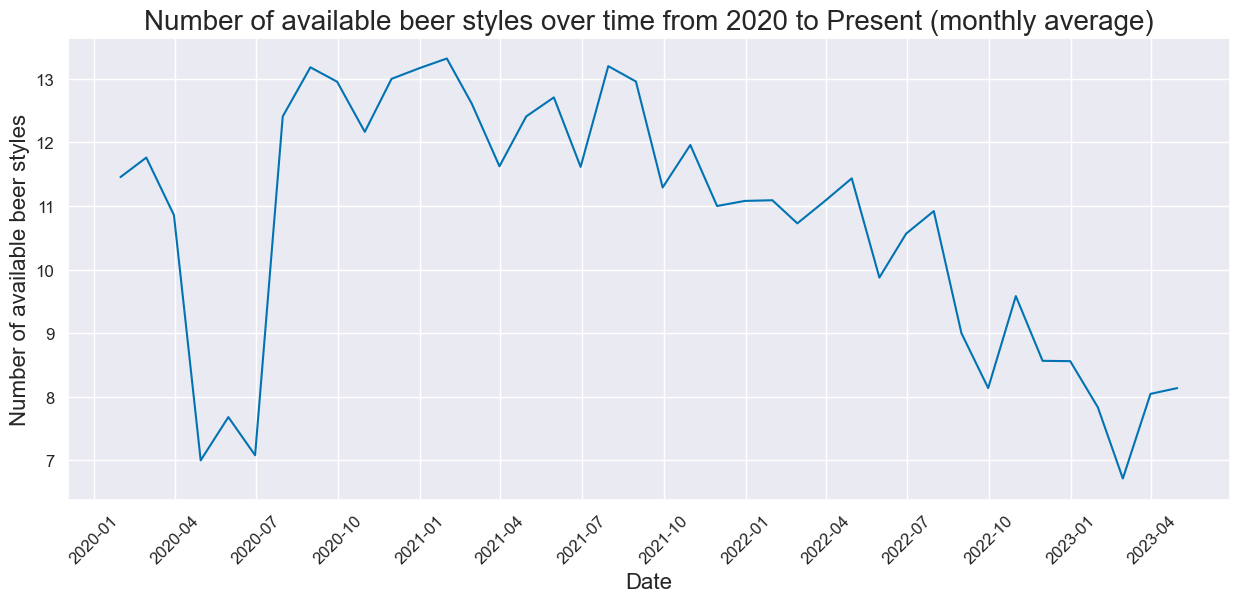

In [25]:
no_styles_sold = sales_data[sales_data['year'] > 2019].groupby('date')['no_styles_sold'].mean()
no_styles_sold = pd.DataFrame(no_styles_sold)
no_styles_sold = no_styles_sold['no_styles_sold'].resample('M').mean().reset_index()

fig, ax = plt.subplots(1,1, figsize=(15, 6))

sns.lineplot(data=no_styles_sold, x='date', y='no_styles_sold')
plt.xticks(rotation=45, fontsize=12)

ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 4, 7, 10)))
date_fmt = mdates.DateFormatter('%Y-%m')
ax.xaxis.set_major_formatter(date_fmt)
ax.xaxis.set_minor_locator(mdates.MonthLocator())
    
plt.title('Number of available beer styles over time from 2020 to Present (monthly average)', fontsize=20)
plt.ylabel('Number of available beer styles', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.show()

### Individual beer style sales

In [26]:
period_sales_primary = sales_data_beer[(sales_data_beer['year'] > 2019) & (sales_data_beer['beer_style']!='Flight')& (sales_data_beer['beer_style']!='Growler')& (sales_data_beer['beer_style']!='Seltzer')& (sales_data_beer['beer_style']!='Mixed')]
period_sales_primary = period_sales_primary.groupby(['date','beer_style'])['gross_sales'].sum()
period_sales_primary = pd.DataFrame(period_sales_primary)
period_sales_primary = period_sales_primary.reset_index()
period_sales_primary['total_sales'] = period_sales_primary.groupby(period_sales_primary['date'])['gross_sales'].transform('sum')
period_sales_primary['portion'] = period_sales_primary['gross_sales'] / period_sales_primary['total_sales']
period_sales_primary

date      beer_style  gross_sales  total_sales   portion
0    2020-01-02             APA          6.0        274.0  0.021898
1    2020-01-02  Belgian Tripel         24.0        274.0  0.087591
2    2020-01-02        Brut IPA         24.0        274.0  0.087591
3    2020-01-02      Double IPA         44.0        274.0  0.160584
4    2020-01-02             ESB         24.0        274.0  0.087591
...         ...             ...          ...          ...       ...
8103 2023-04-30             IPA        154.0        549.0  0.280510
8104 2023-04-30     Irish Lager         40.0        549.0  0.072860
8105 2023-04-30  Jalapeño Cream         83.0        549.0  0.151184
8106 2023-04-30      Milk Stout         32.0        549.0  0.058288
8107 2023-04-30       Some Pulp        118.0        549.0  0.214936

[8108 rows x 5 columns]

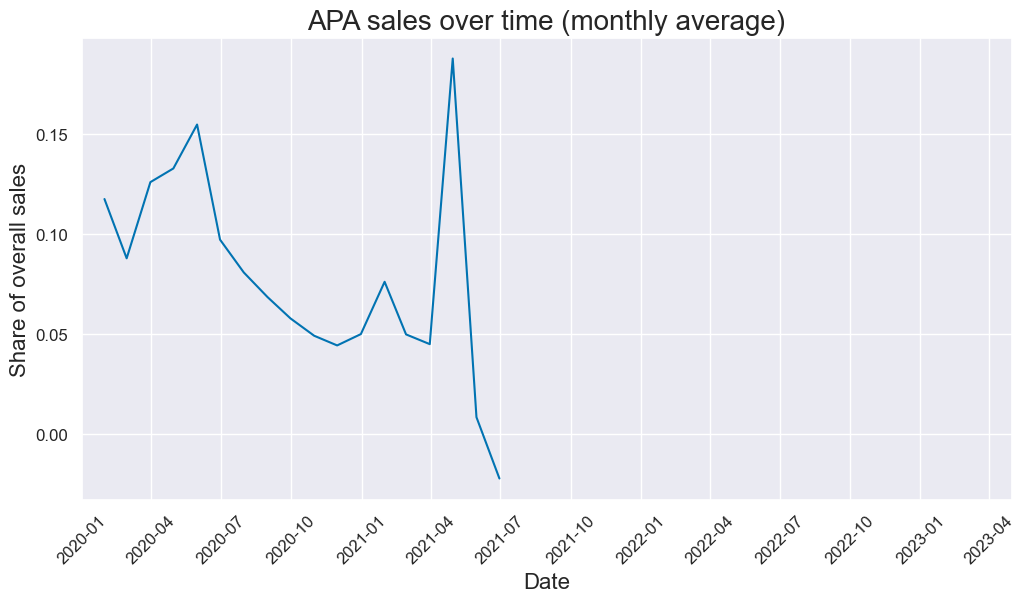

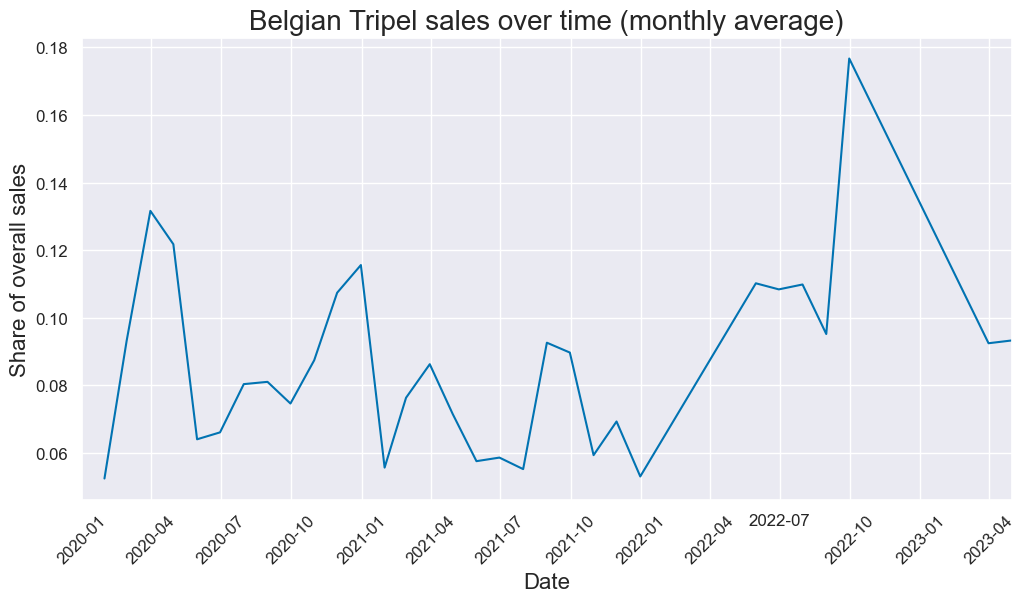

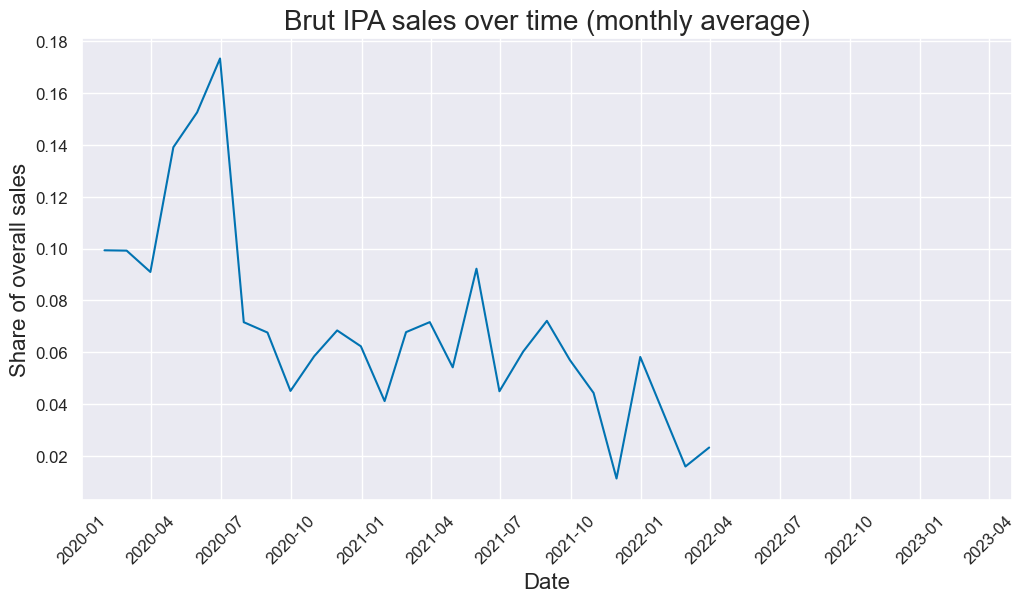

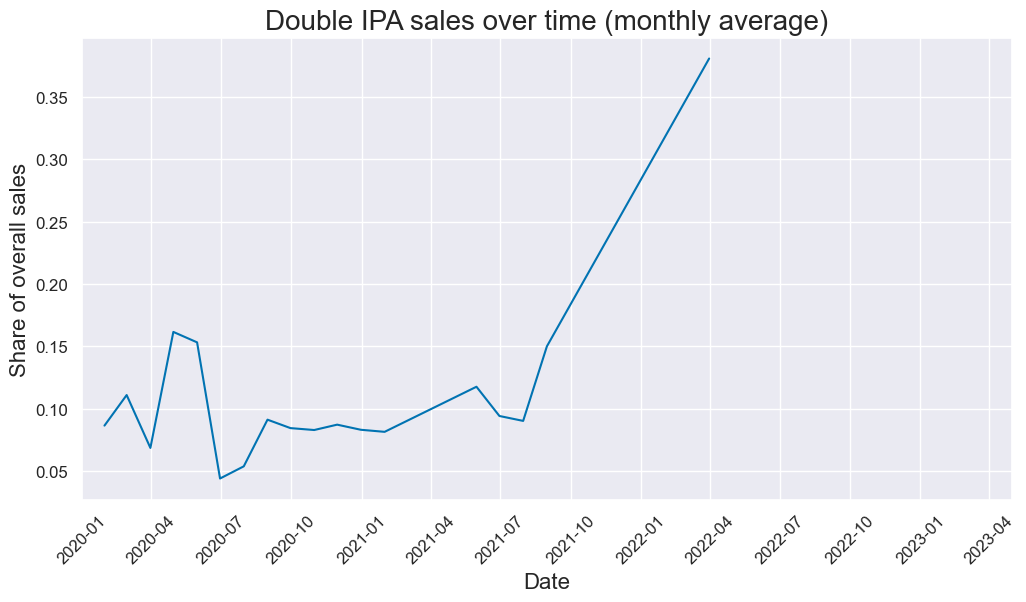

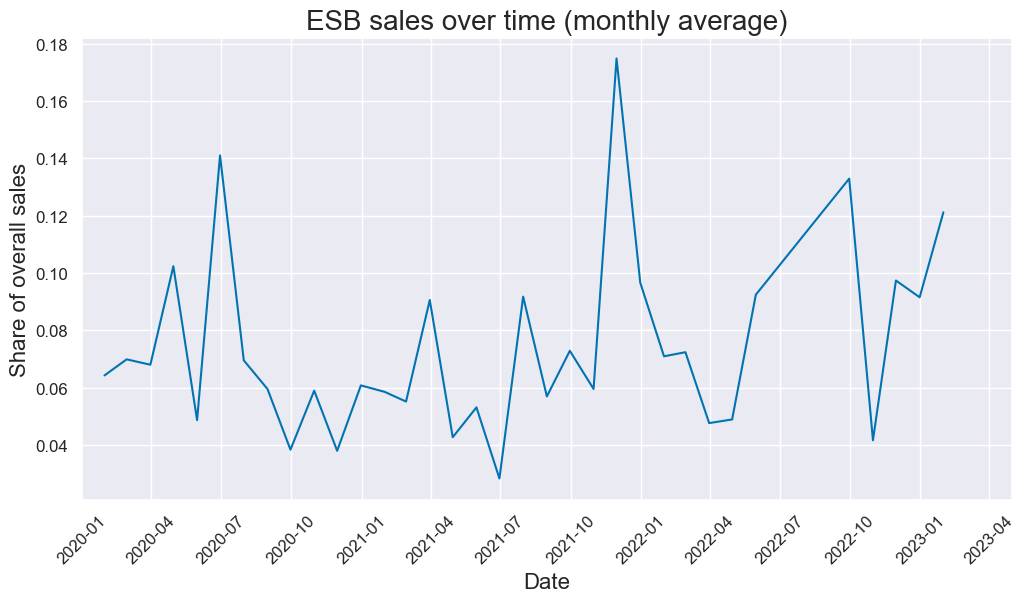

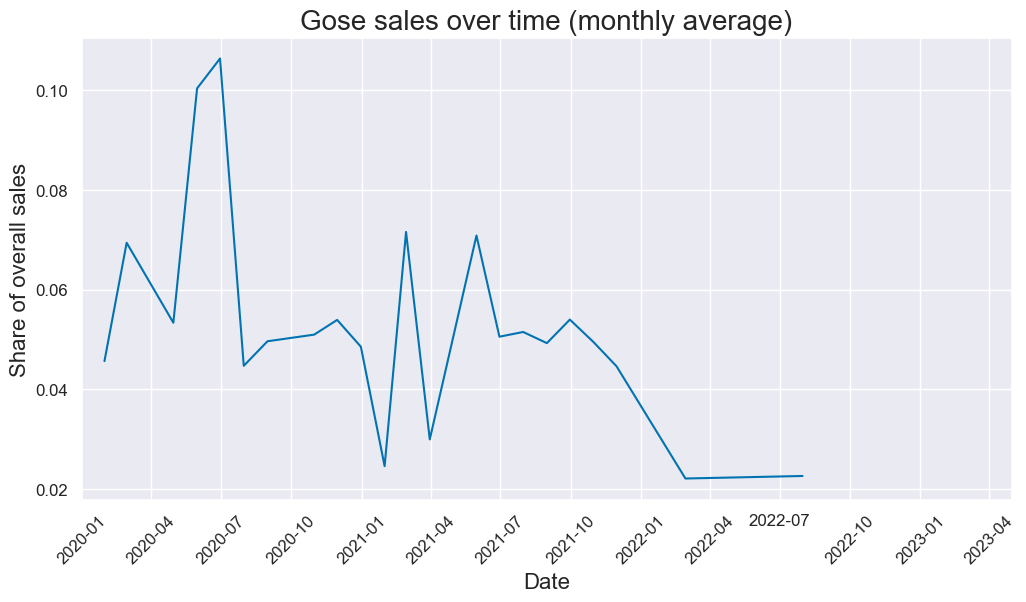

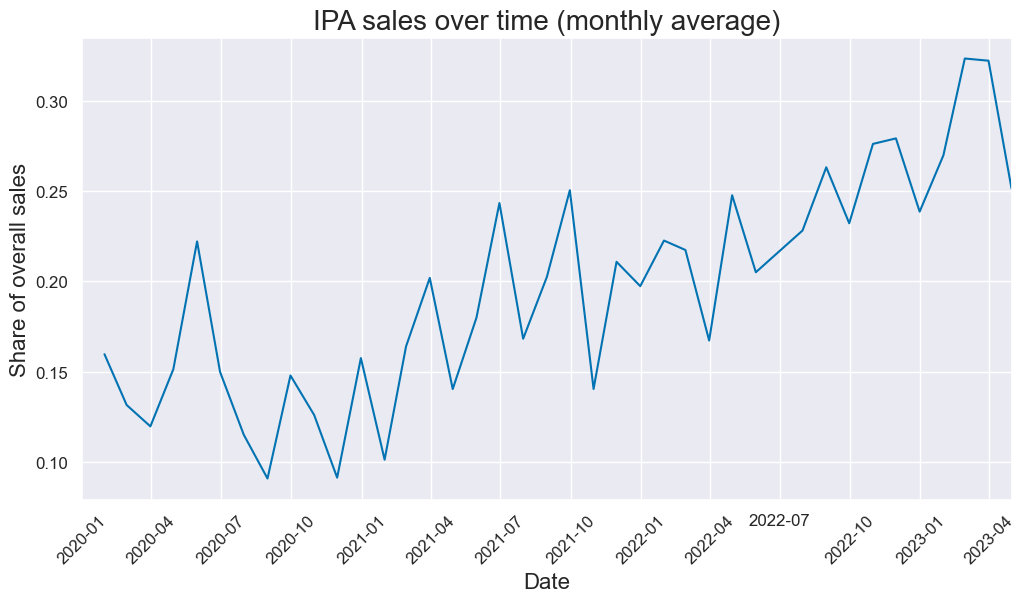

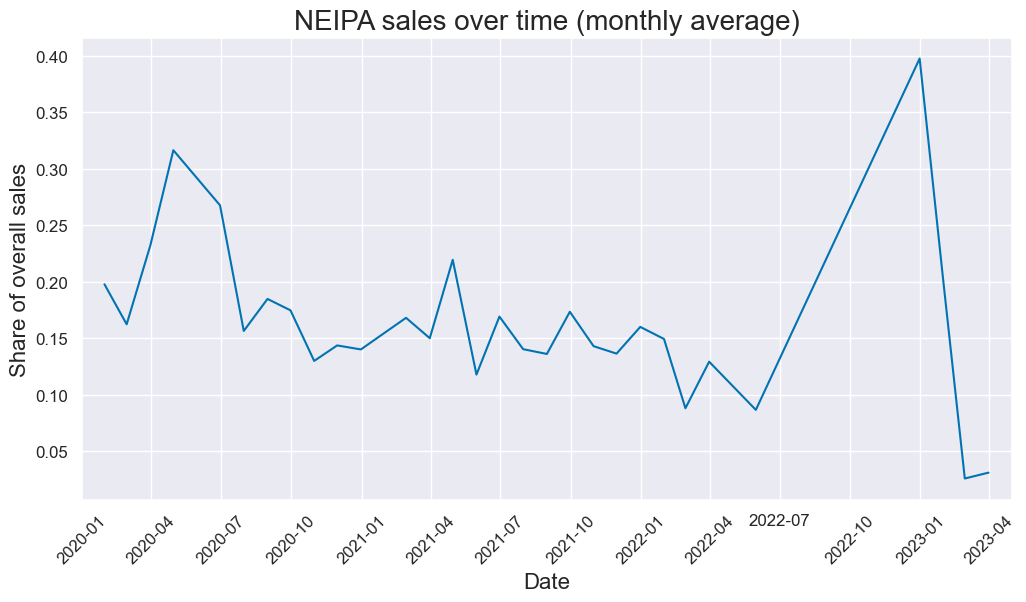

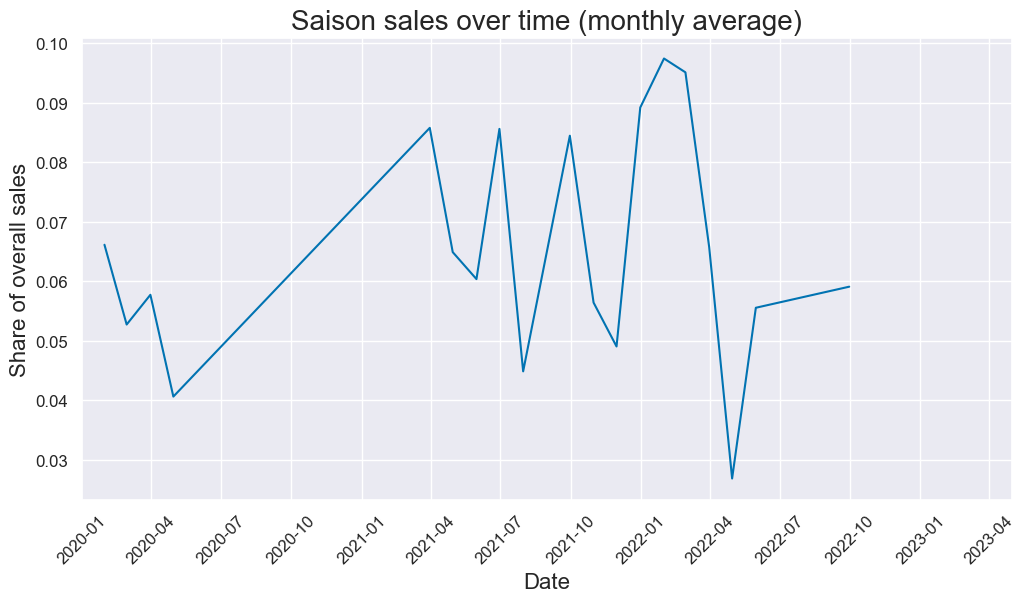

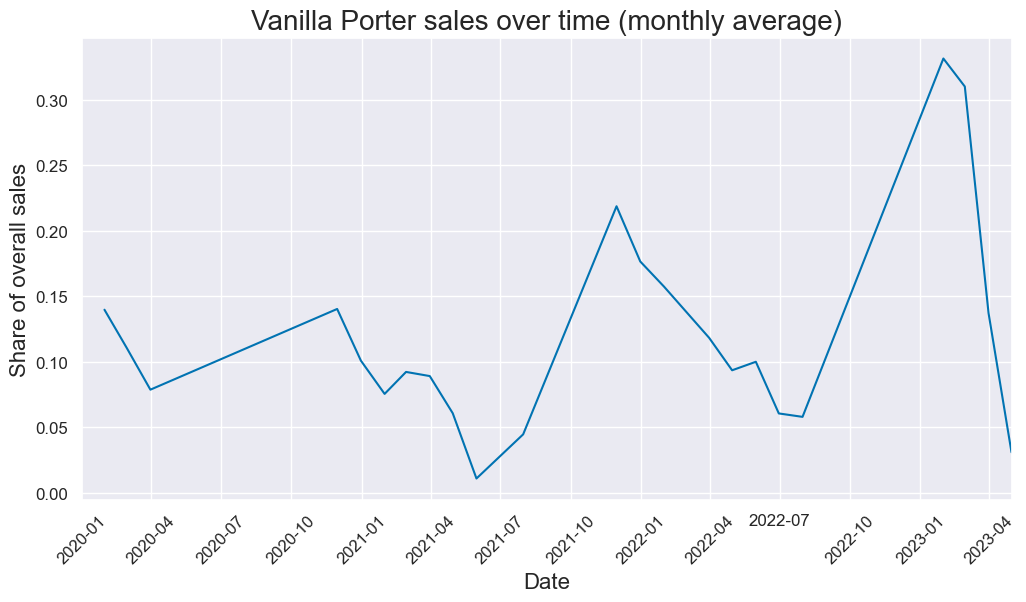

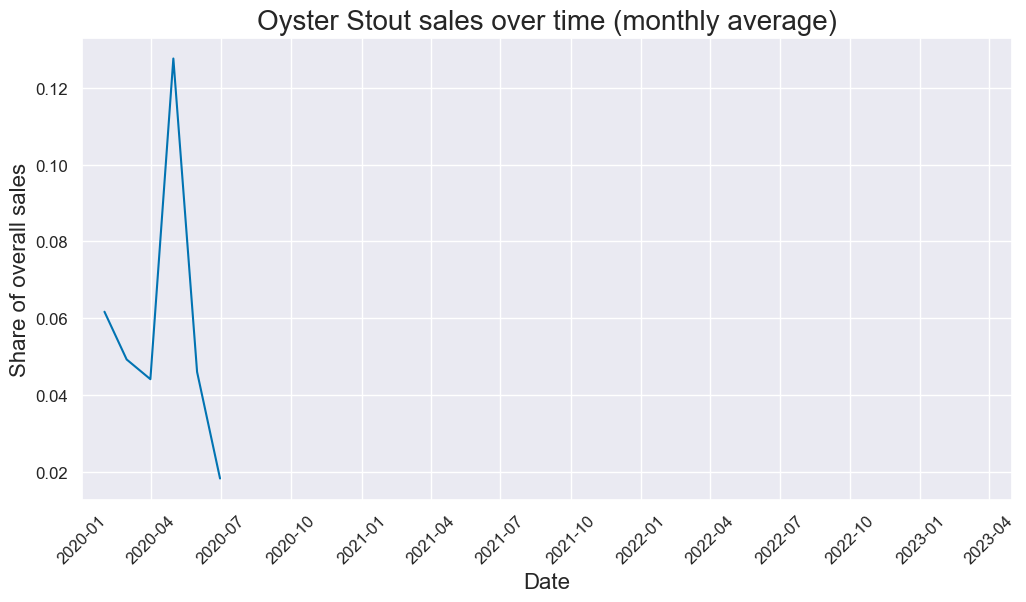

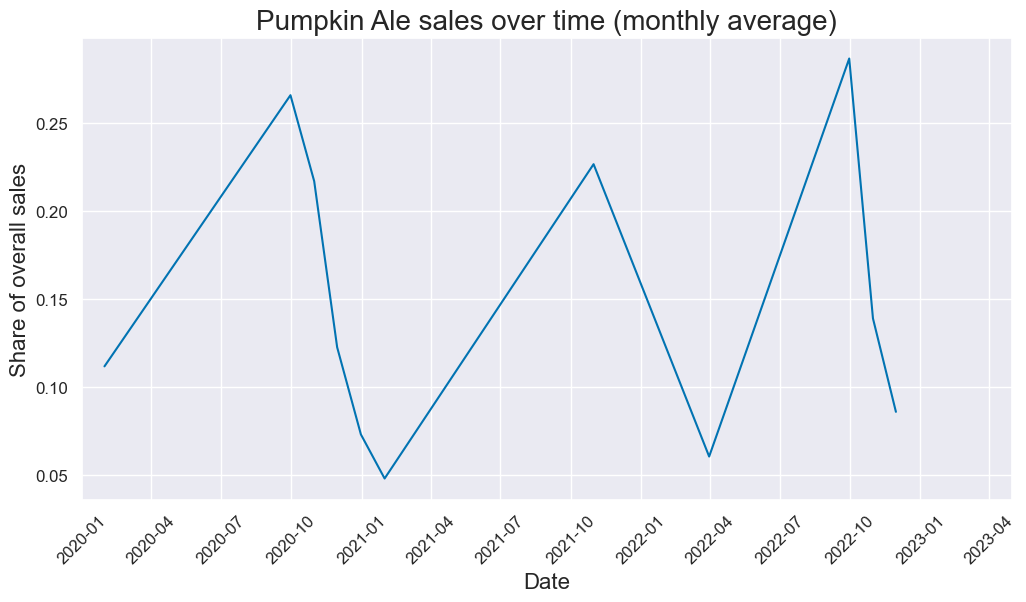

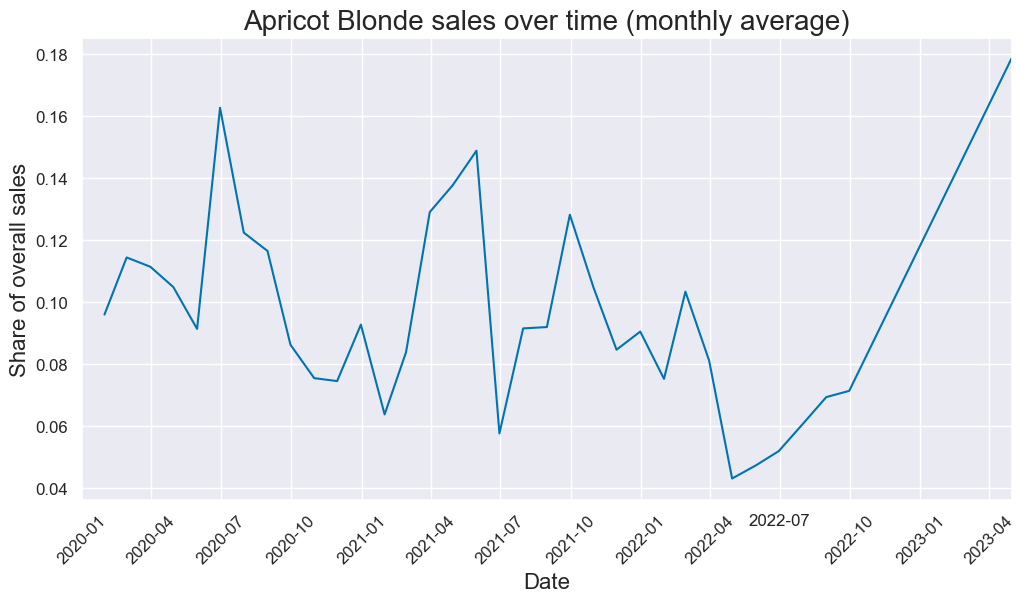

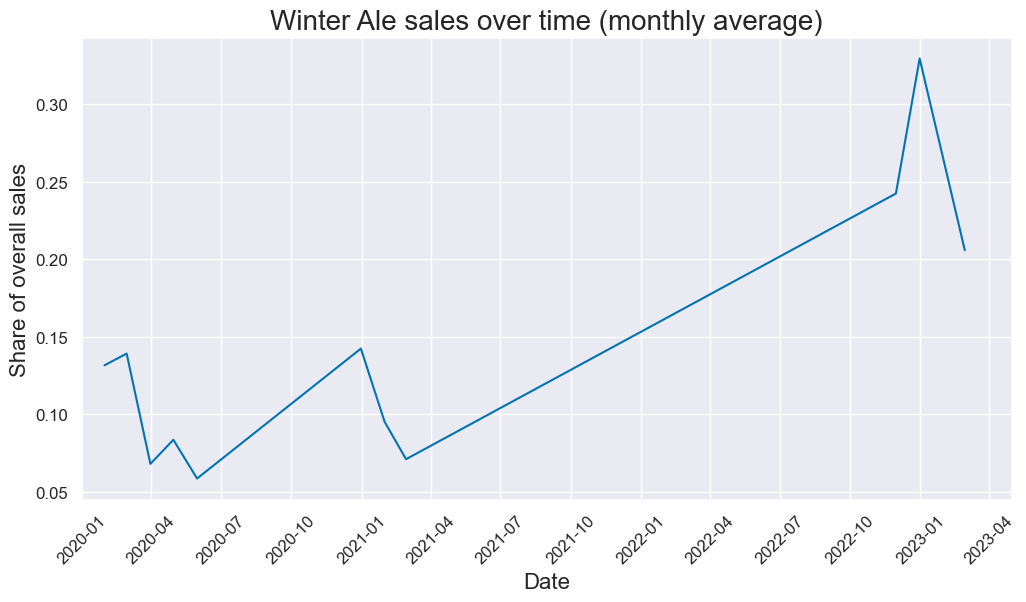

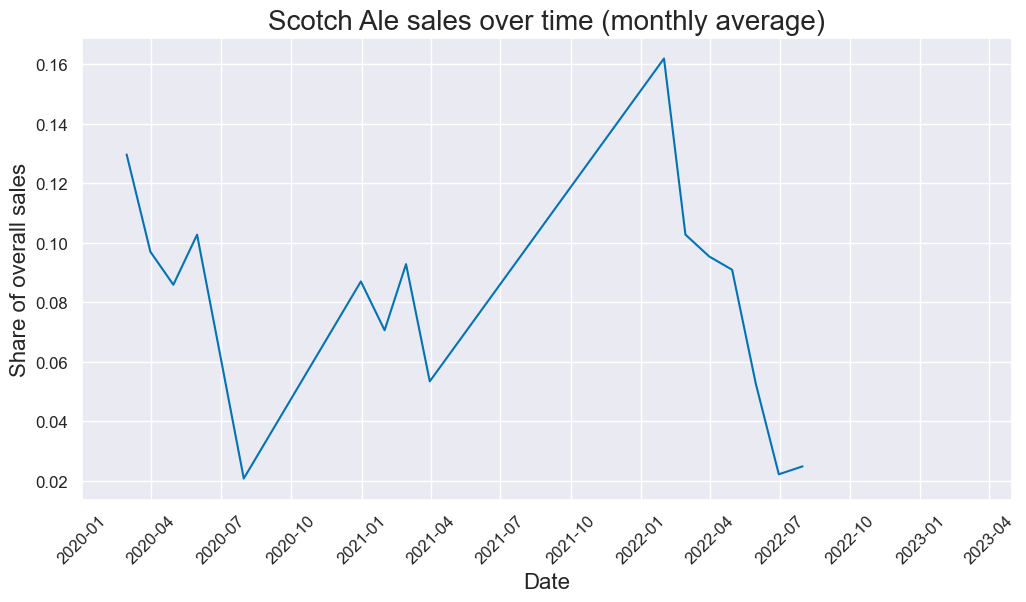

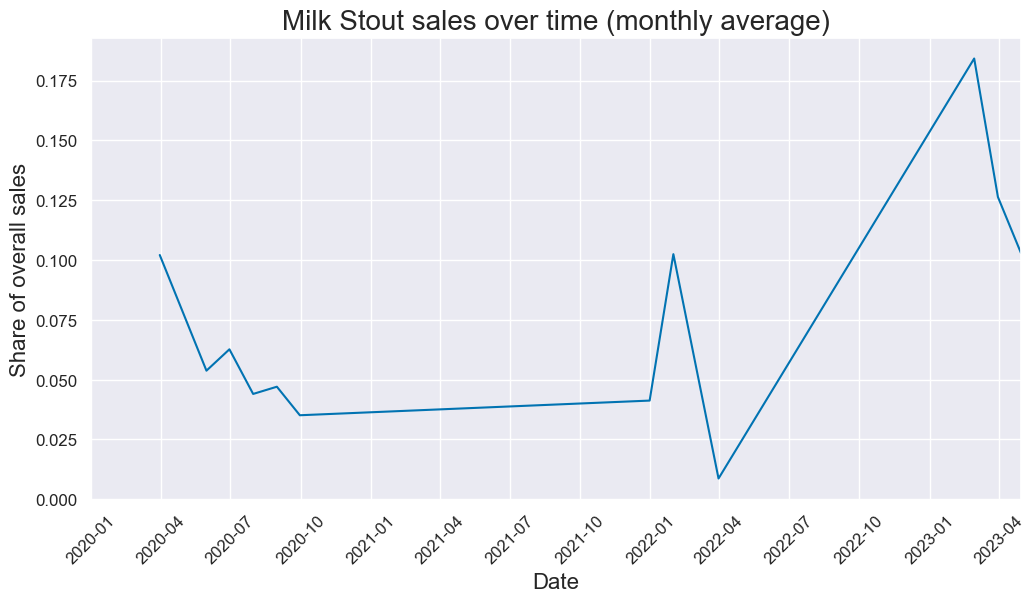

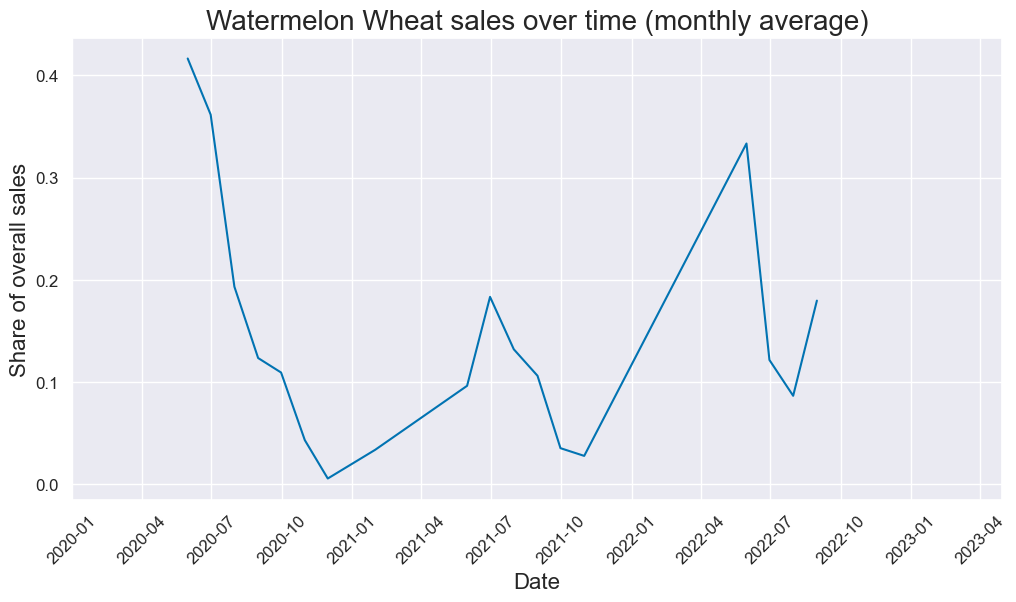

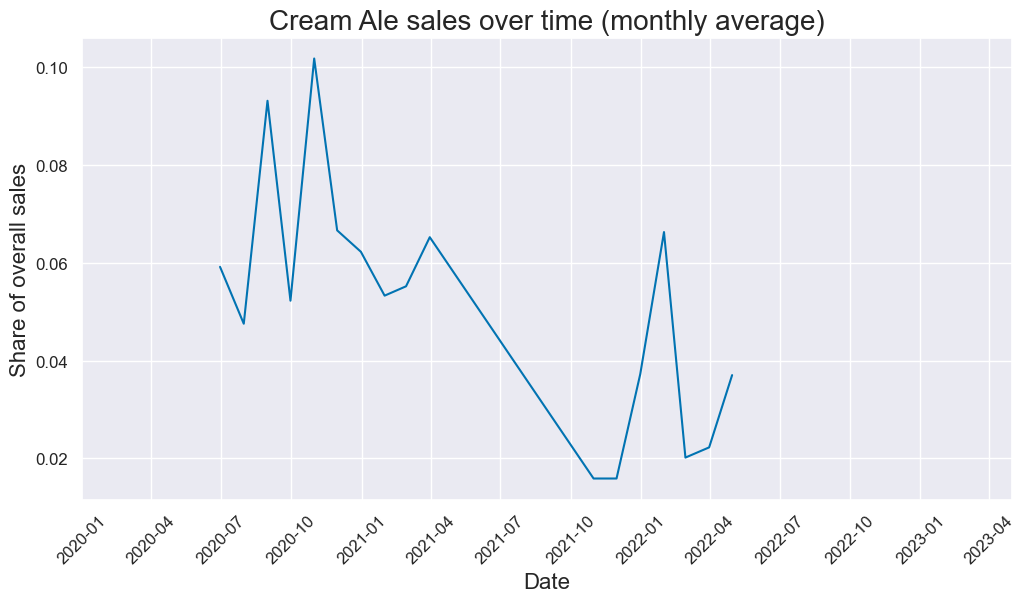

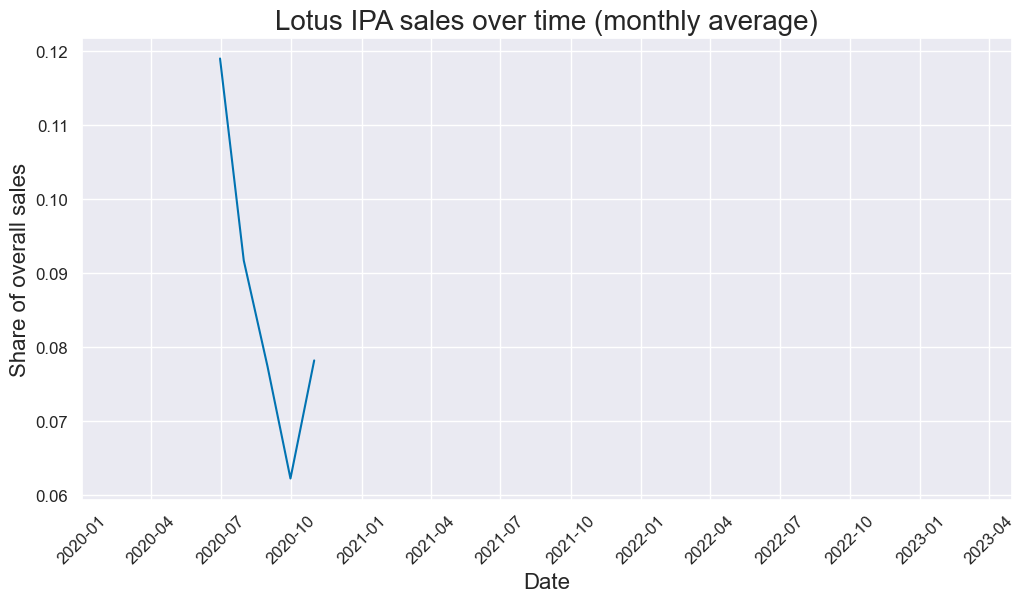

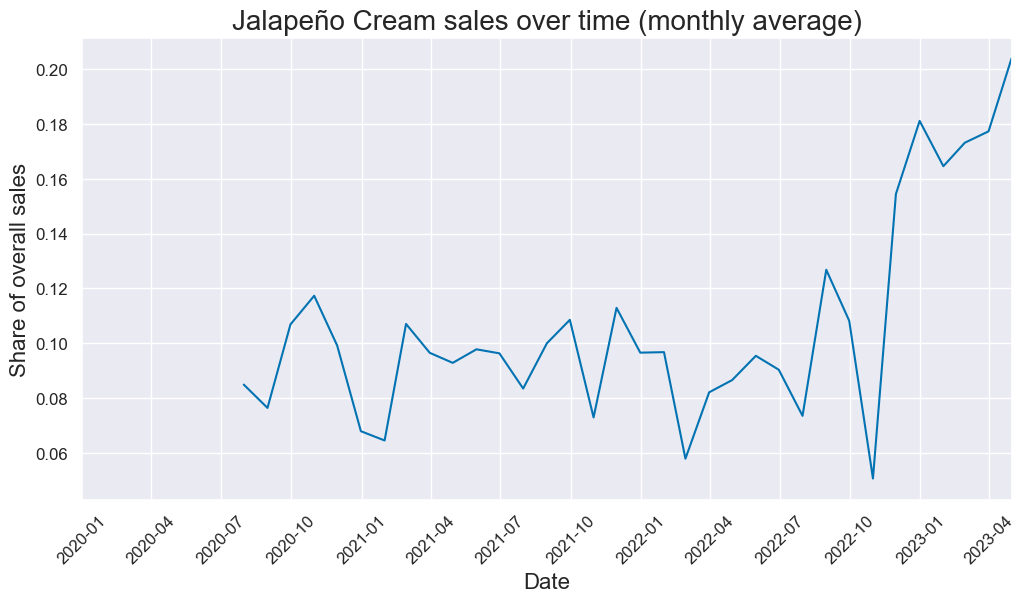

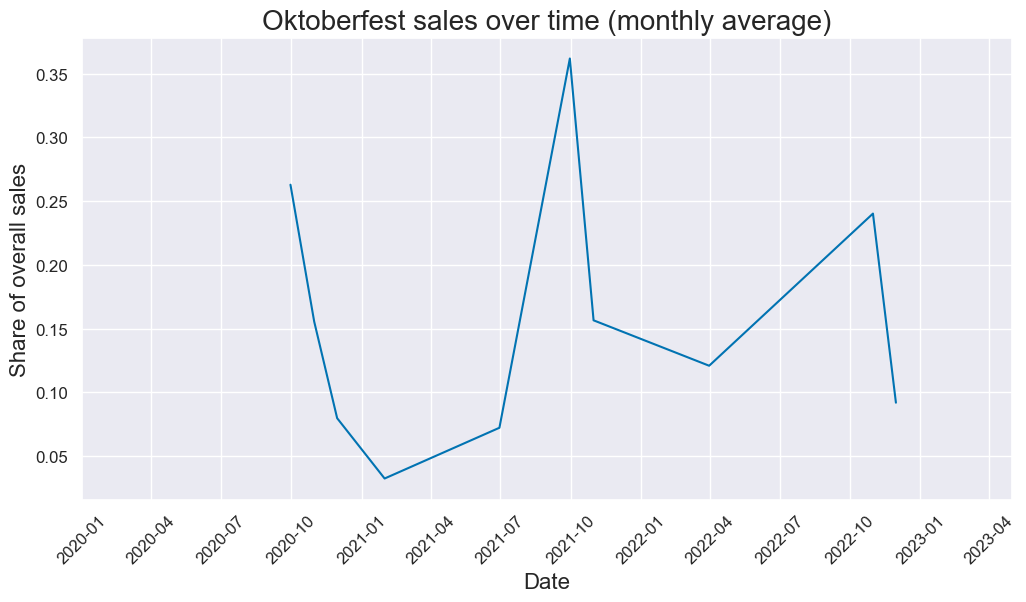

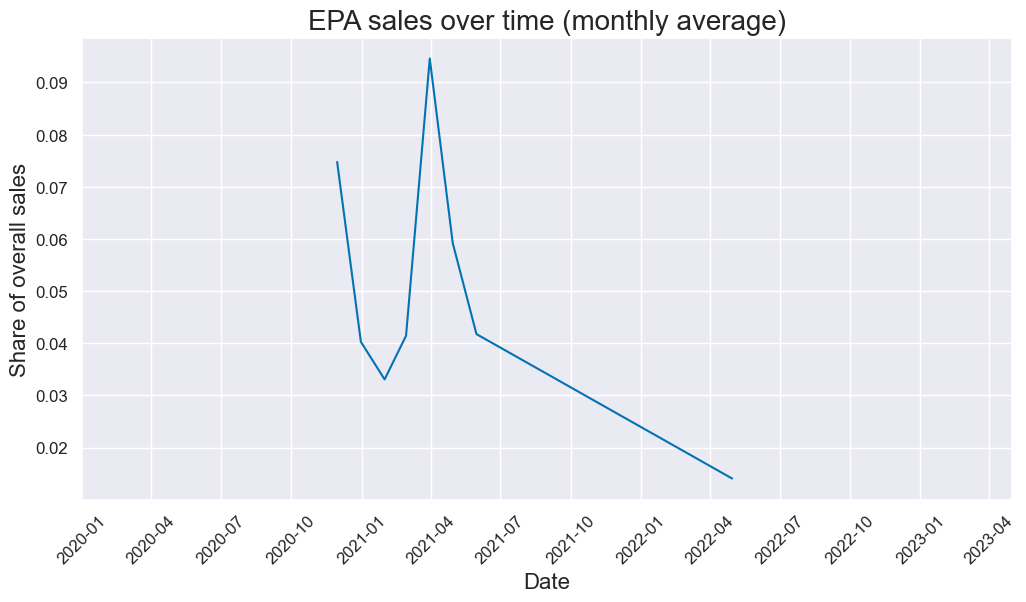

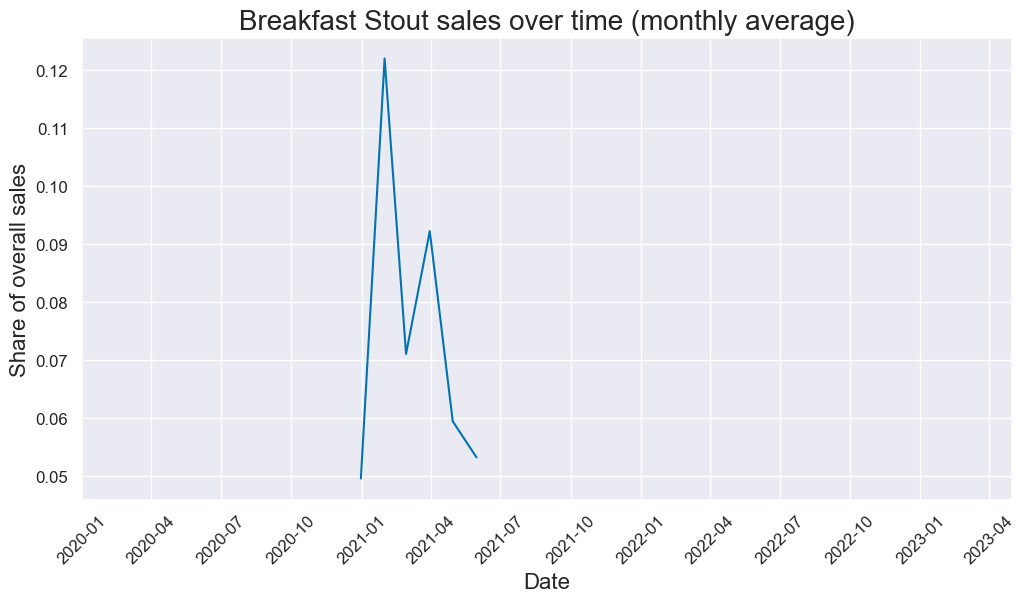

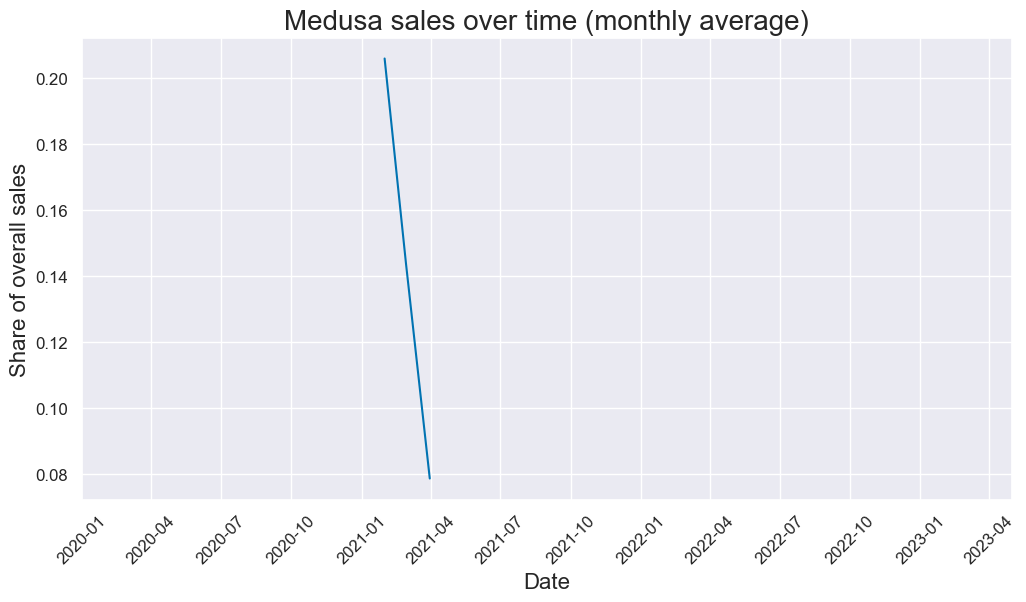

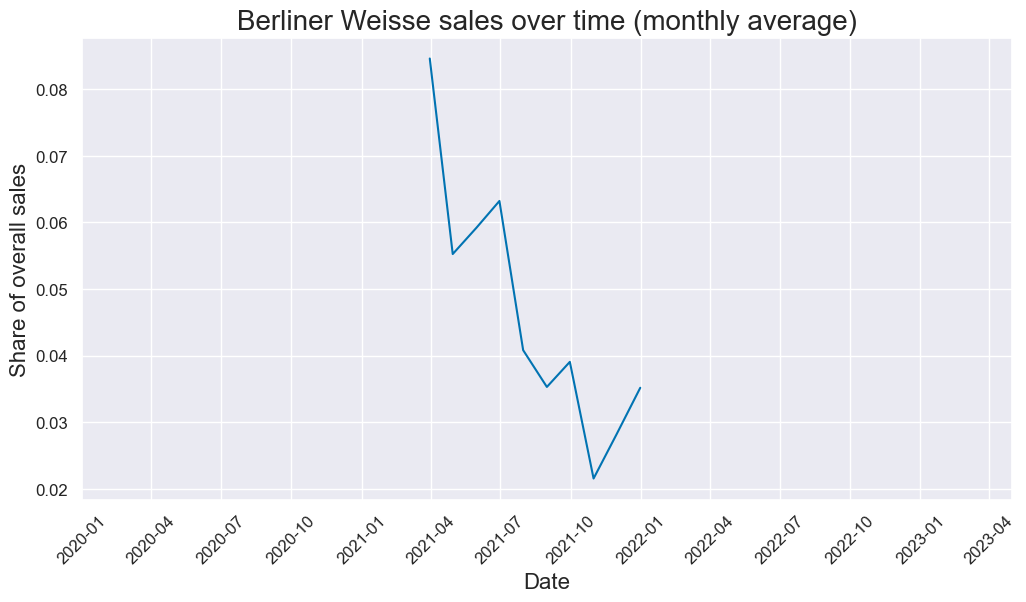

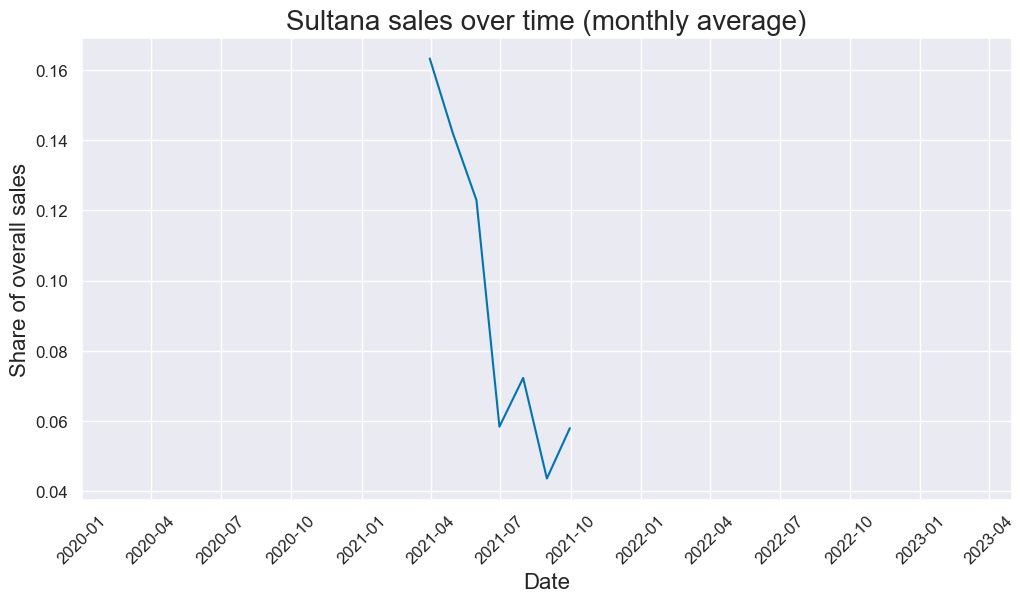

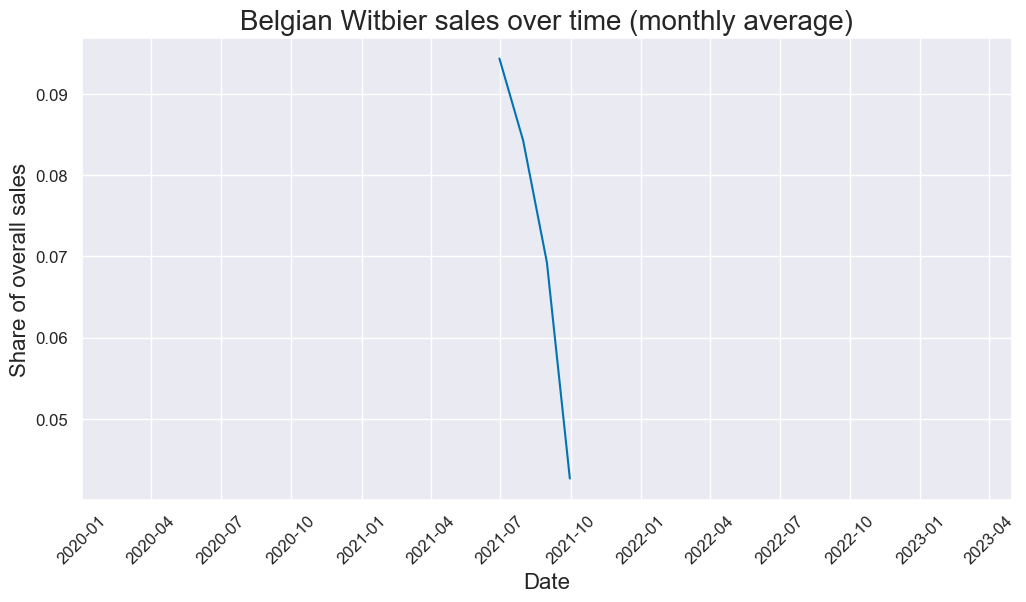

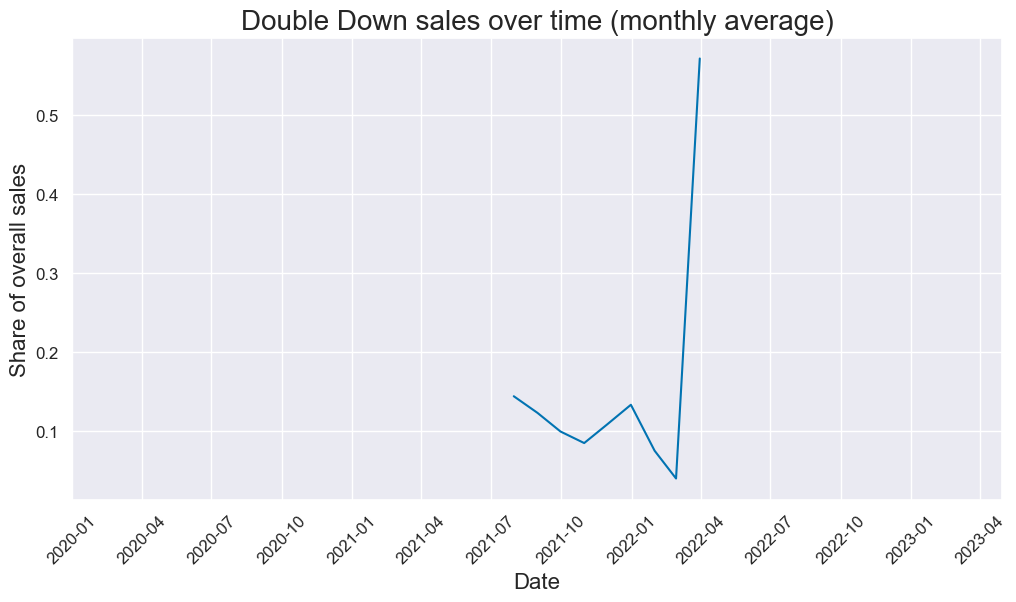

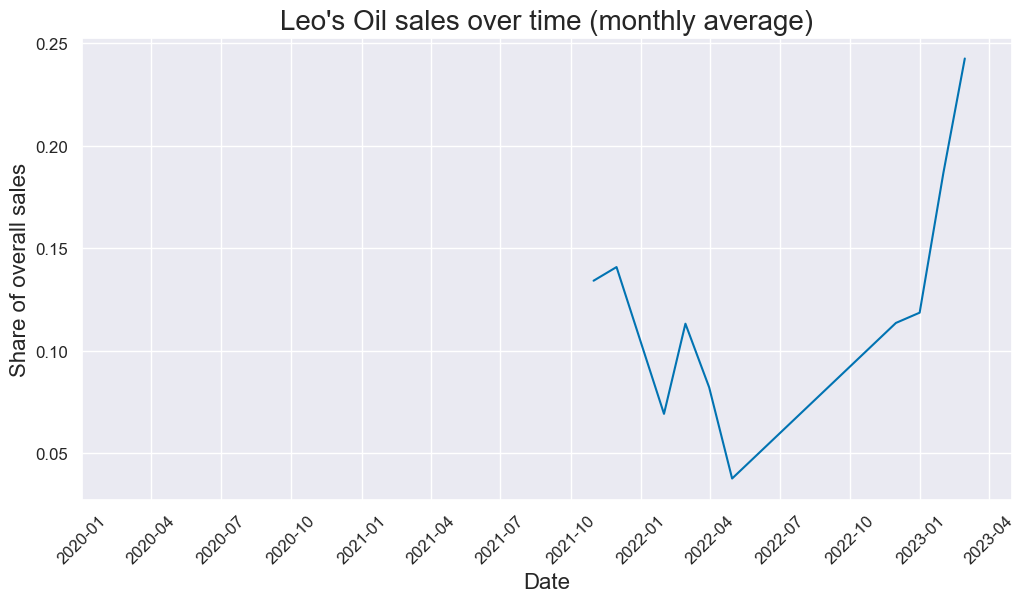

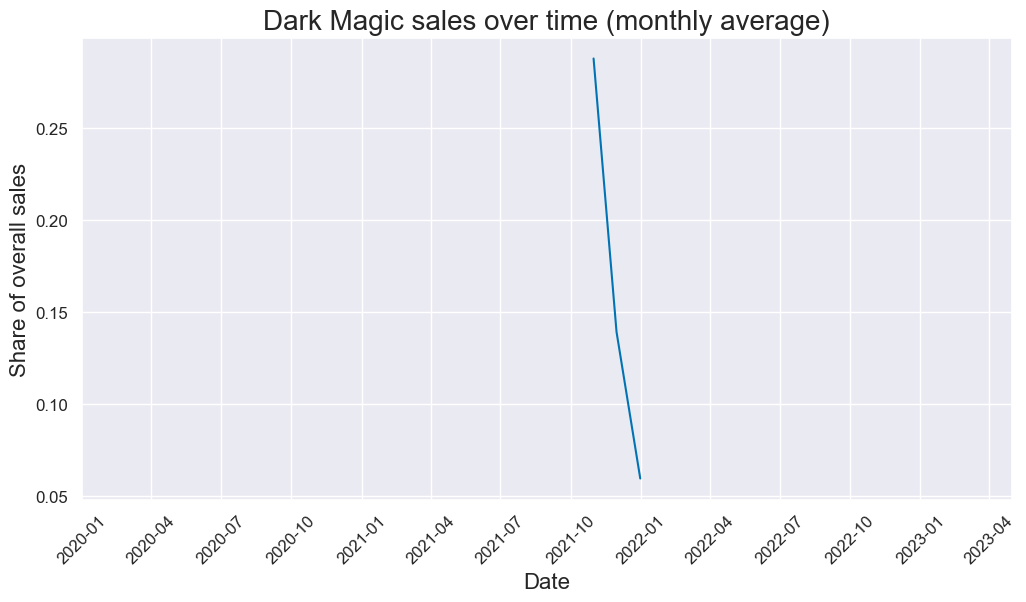

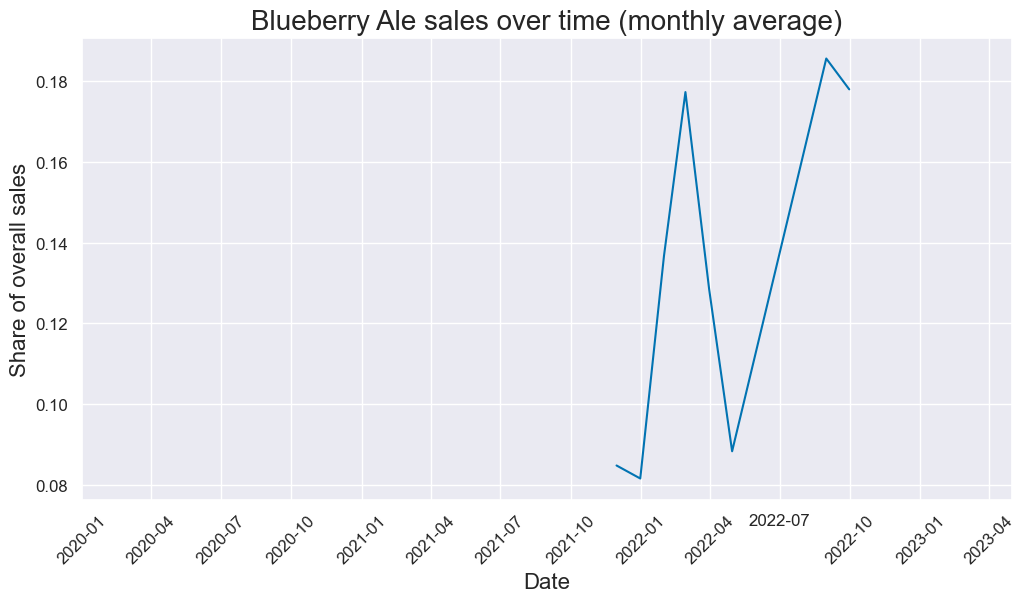

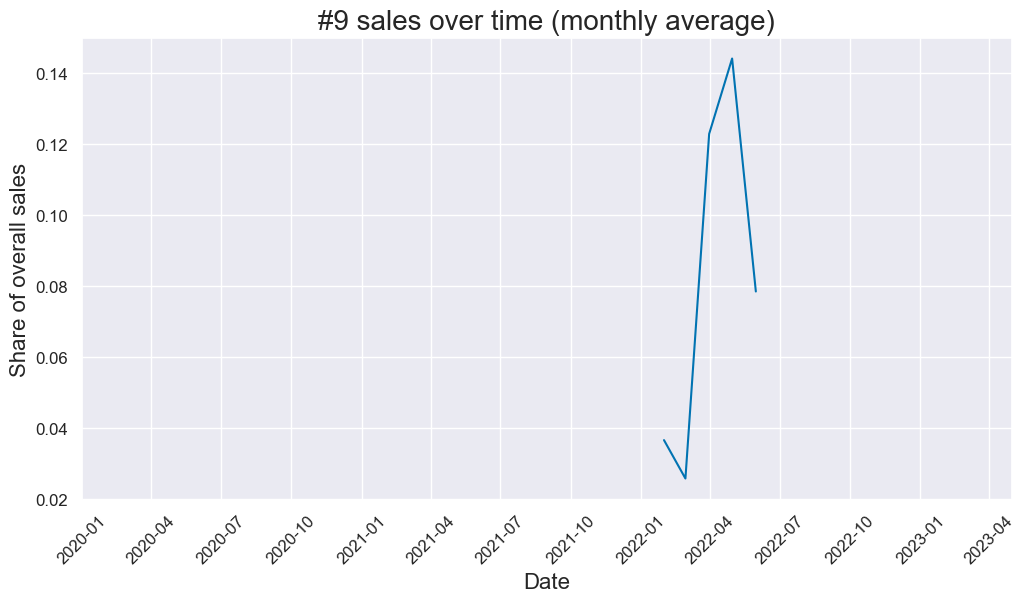

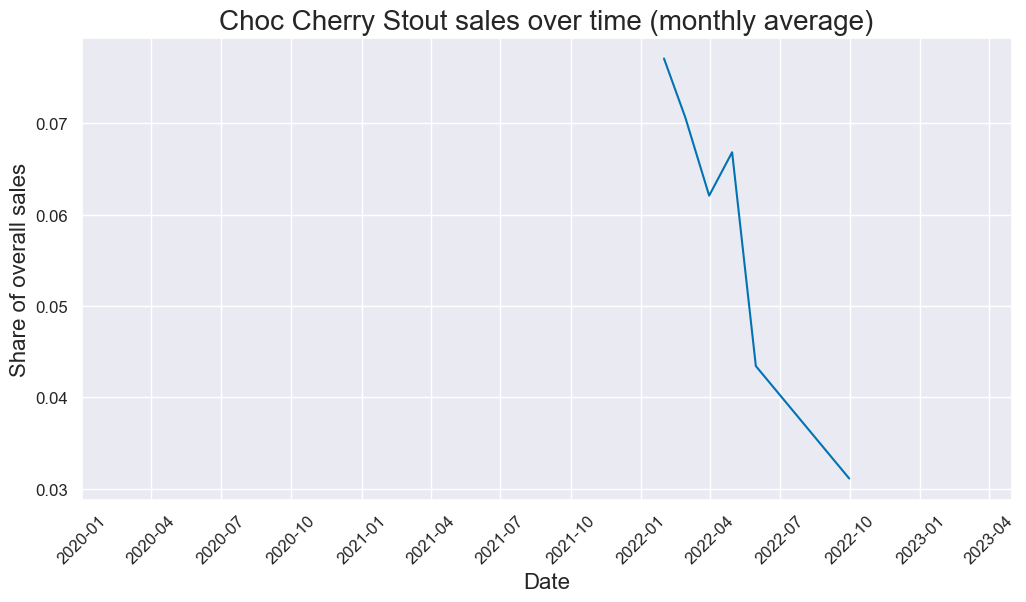

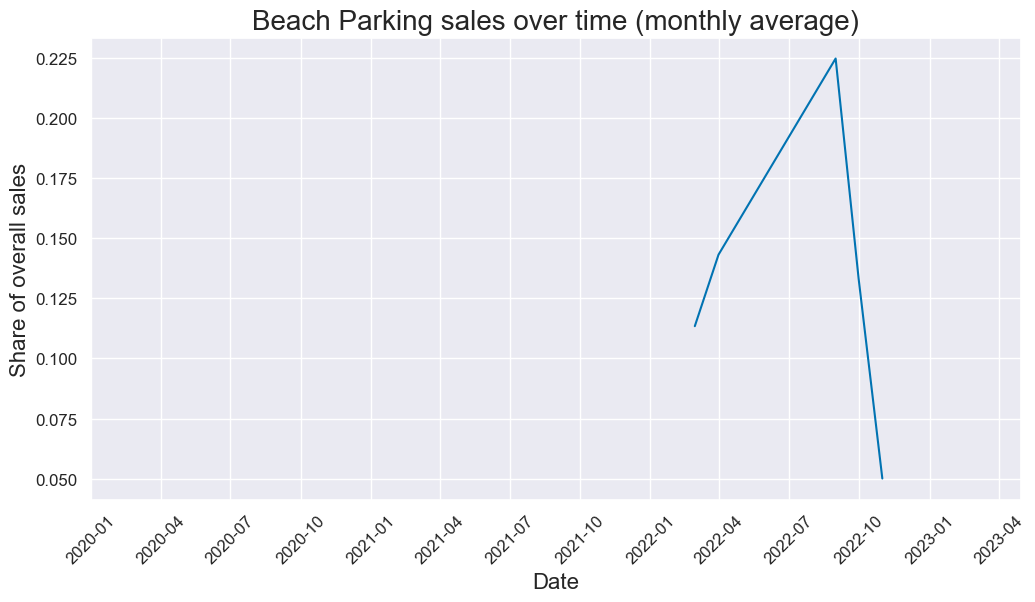

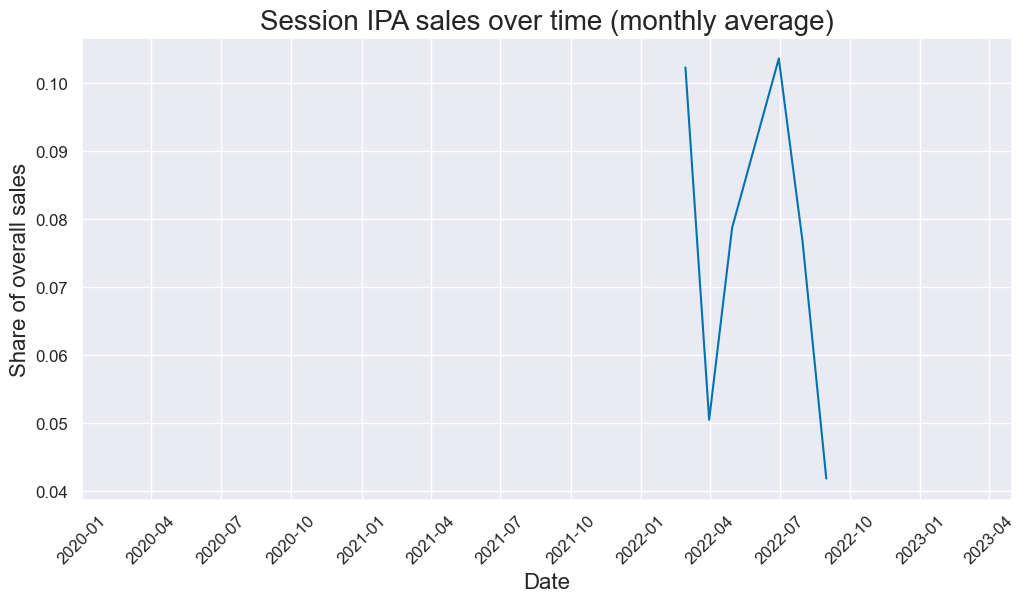

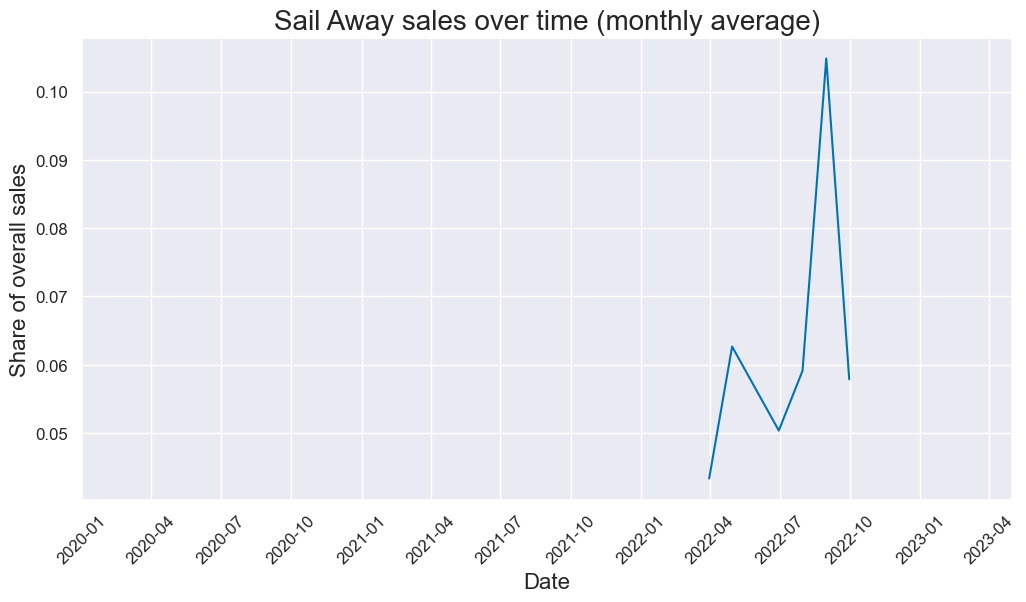

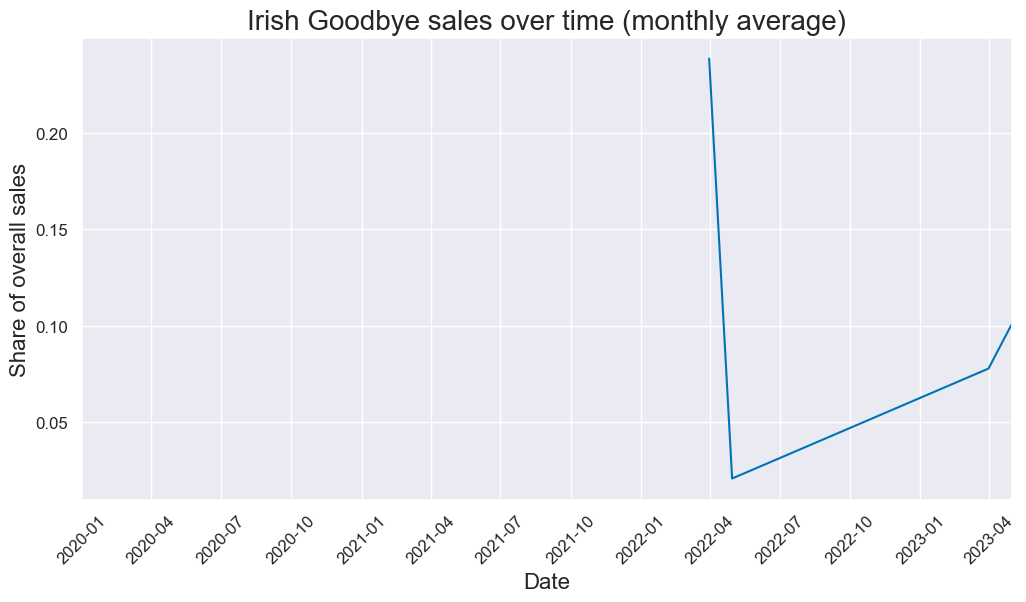

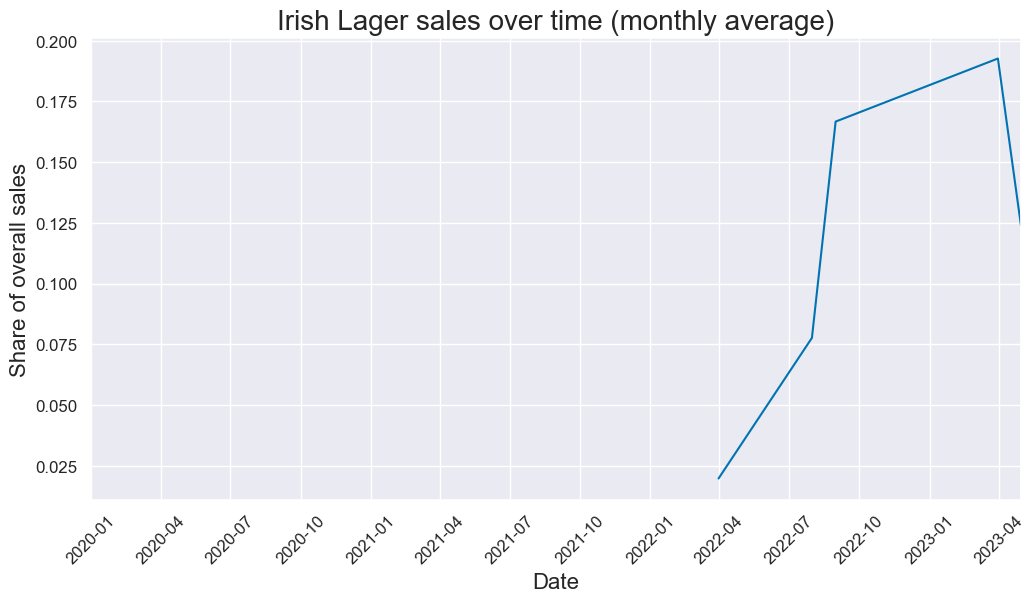

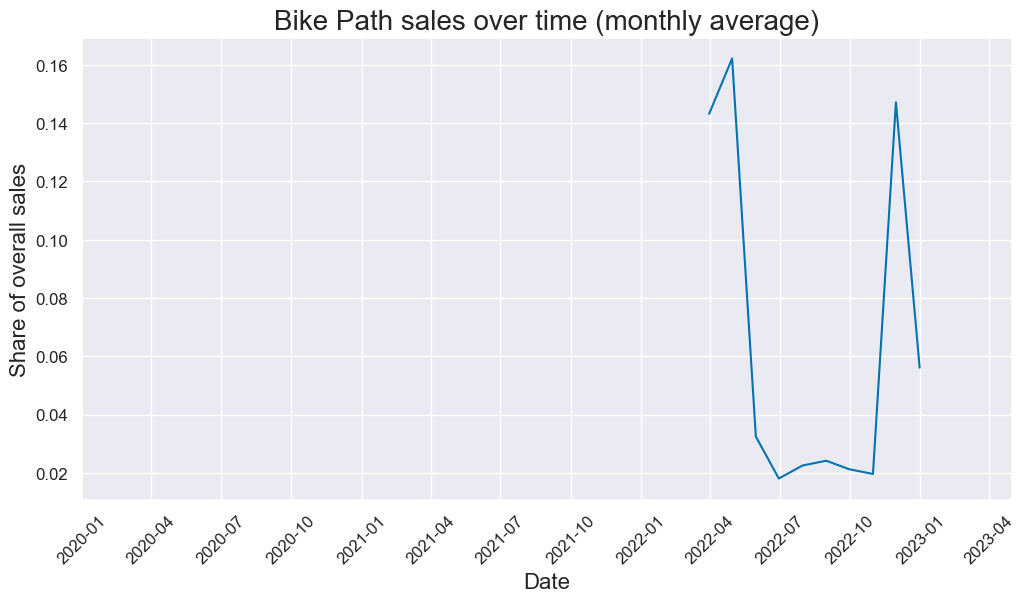

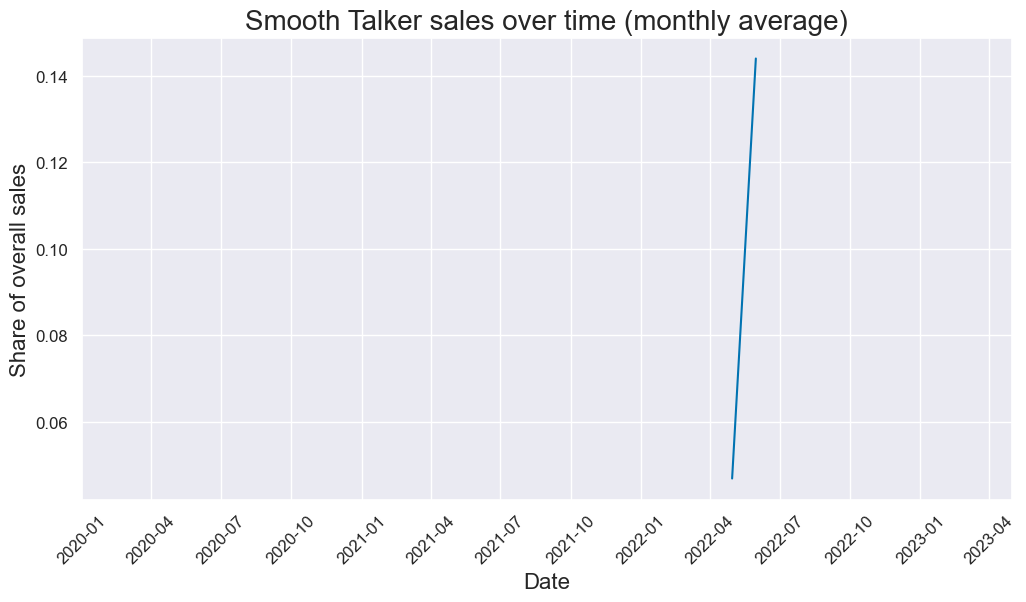

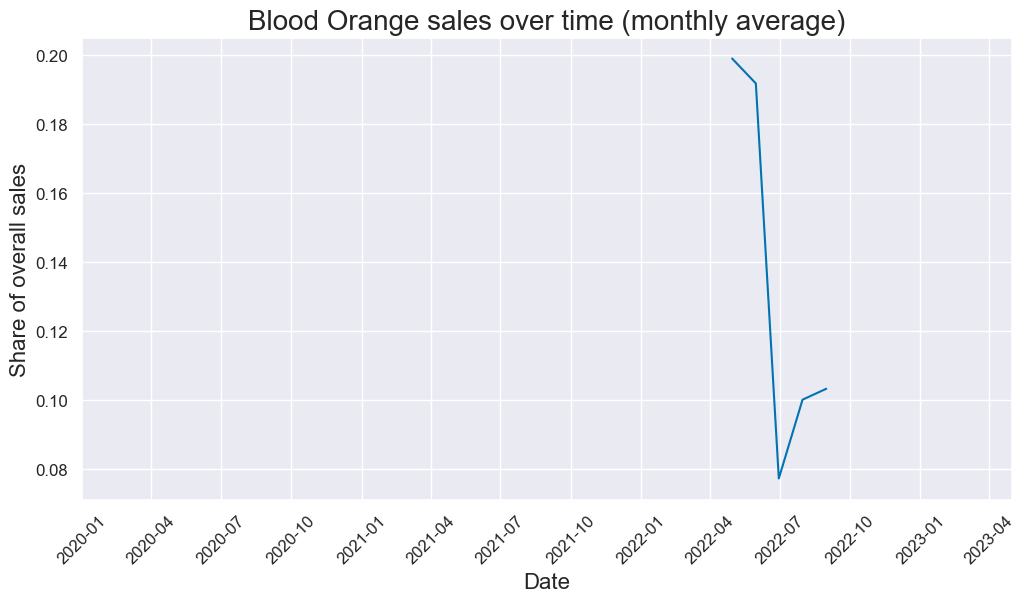

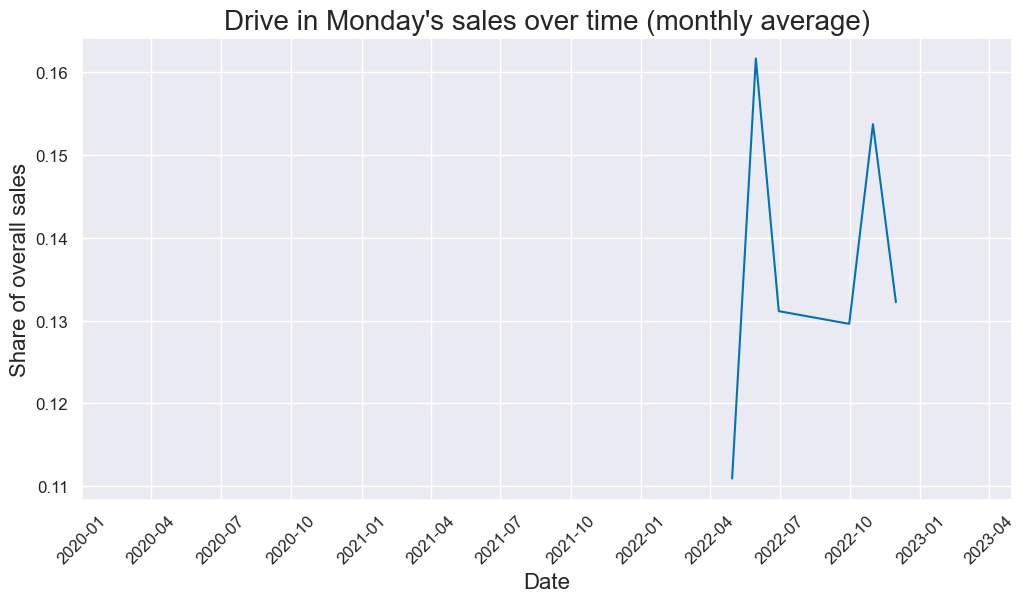

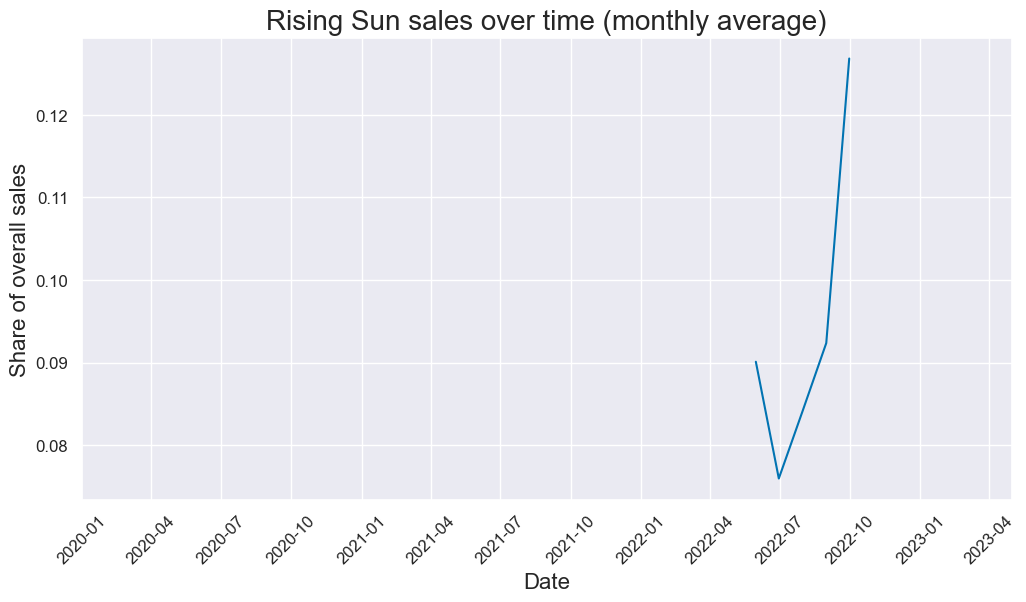

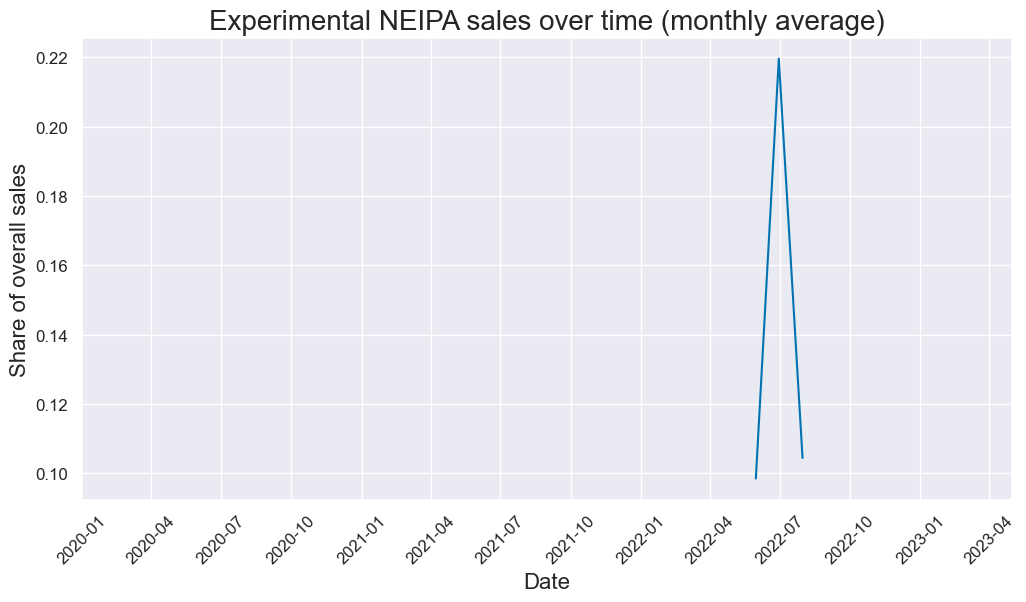

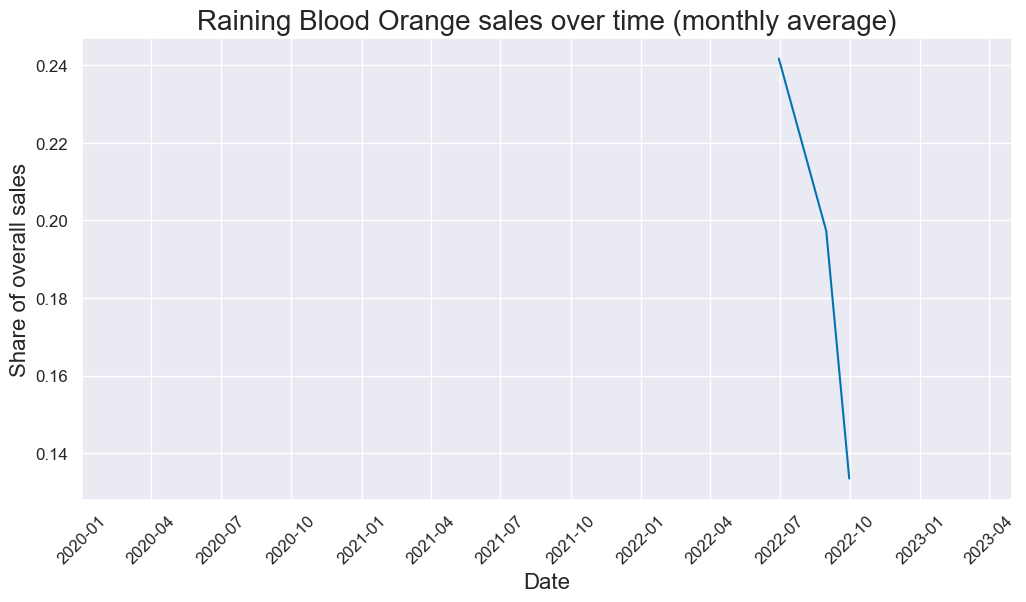

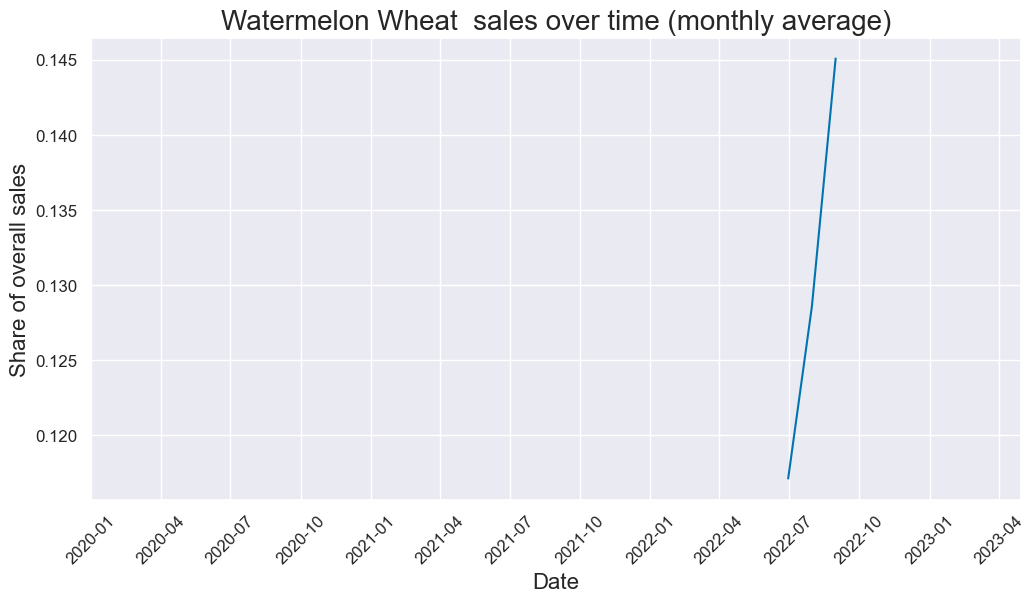

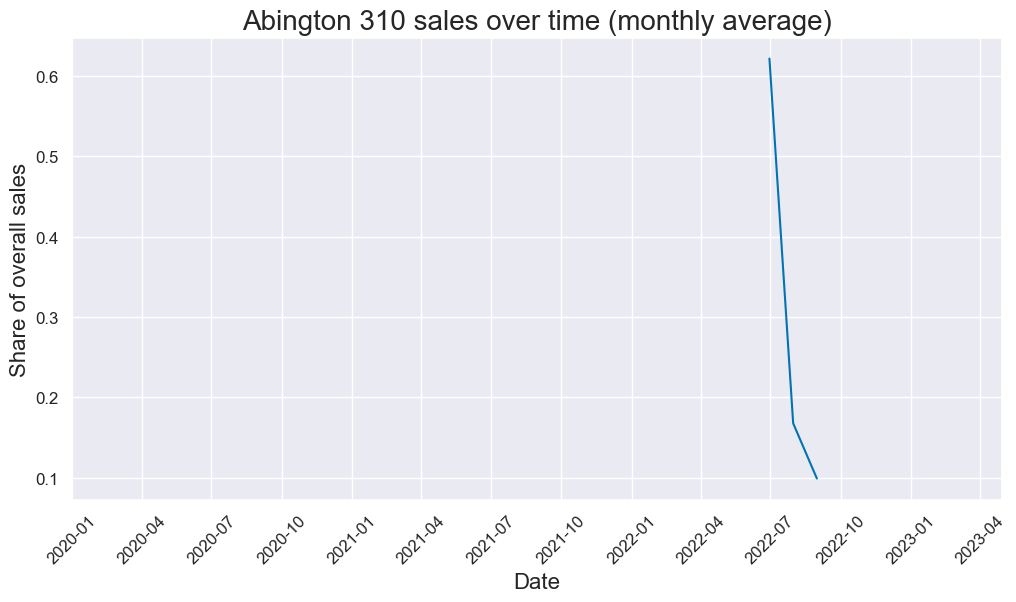

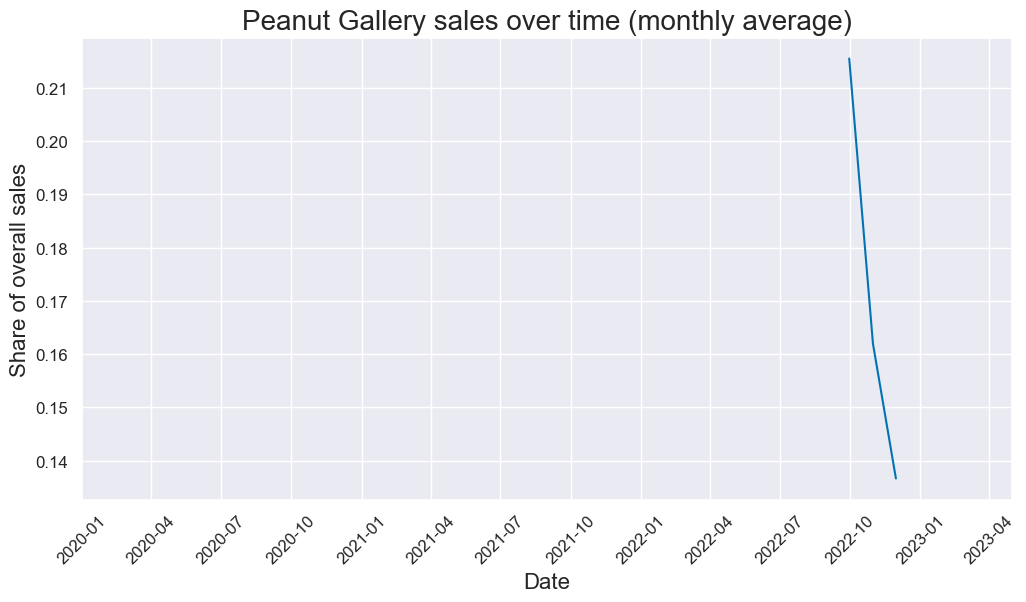

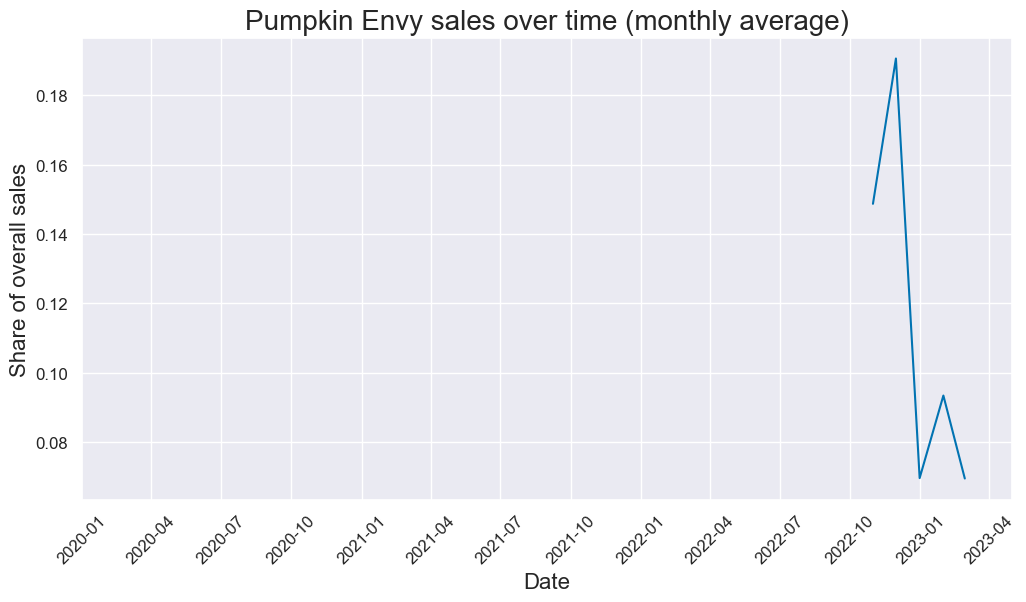

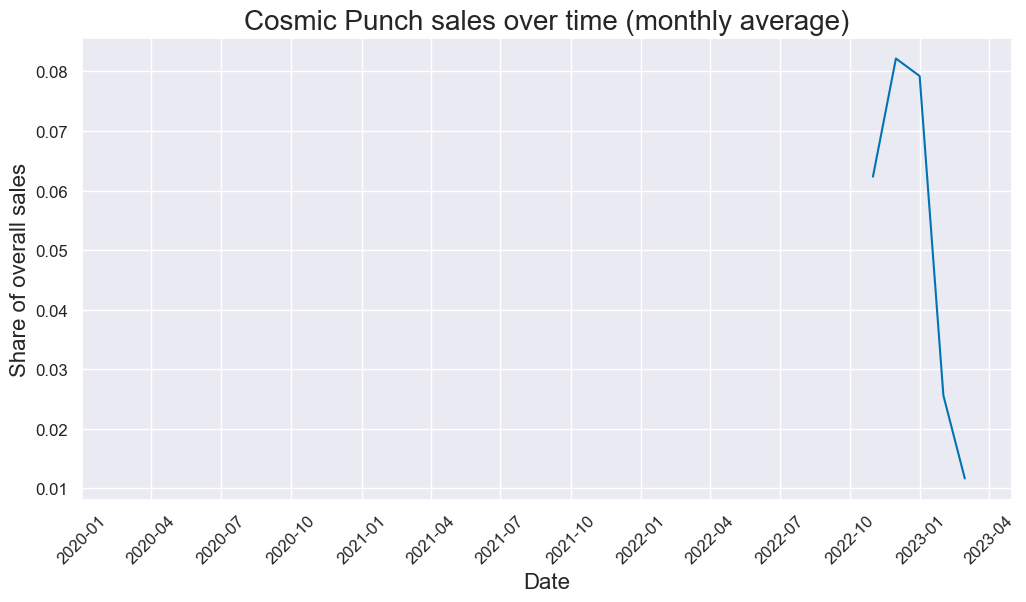

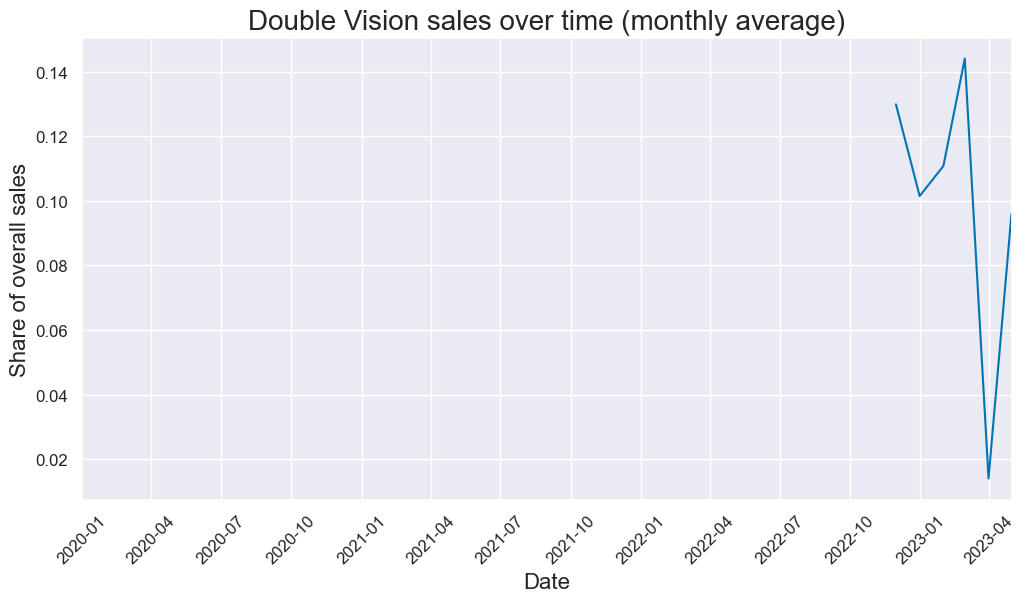

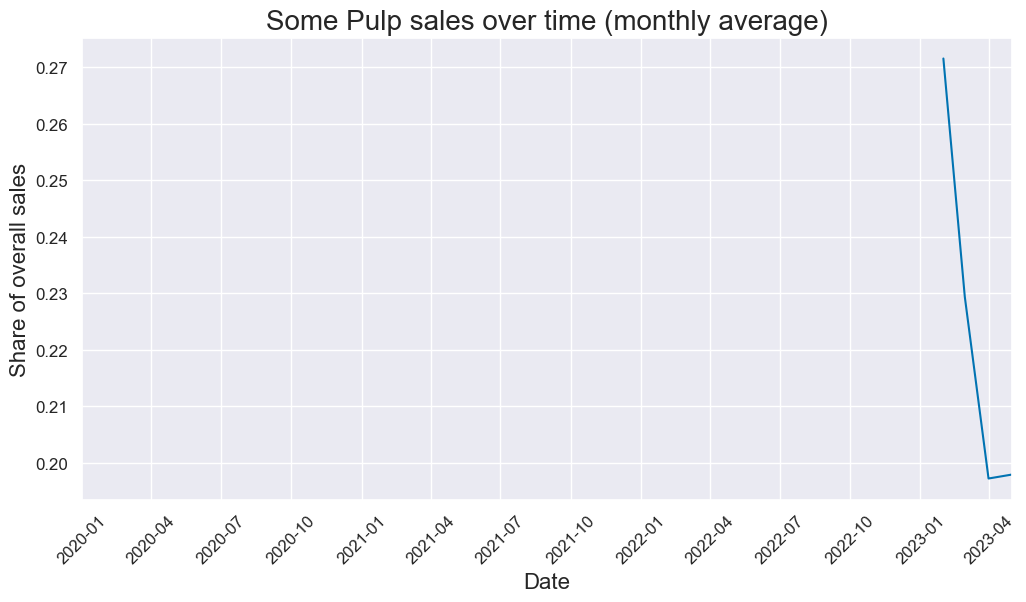

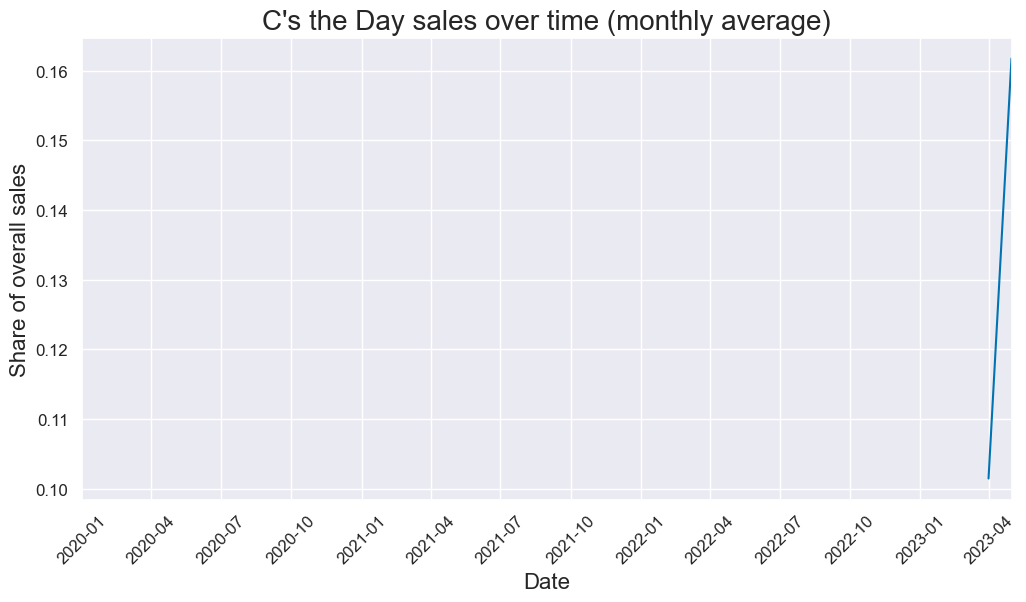

In [29]:
import datetime as dt
import matplotlib.dates as mdates

styles_list = list(period_sales_primary['beer_style'].unique())
for style in styles_list:
    style_gross = period_sales_primary[period_sales_primary['beer_style']==style]
    style_gross.set_index('date', inplace=True)
    style_gross = style_gross['portion'].resample('M').mean().reset_index()

    fig, ax = plt.subplots(1, 1, figsize=(12, 6))    
    sns.lineplot(style_gross, x='date', y='portion')
    plt.title(str(style) + ' sales over time (monthly average)', fontsize=20)
    plt.xlim([dt.date(2020, 1, 1), dt.date(2023, 4, 30)])
    plt.xticks(rotation=45, fontsize=12)
    plt.xlabel('Date', fontsize=16)
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 4, 7, 10)))
    date_fmt = mdates.DateFormatter('%Y-%m')
    ax.xaxis.set_major_formatter(date_fmt)
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.grid(True)
    plt.ylabel('Share of overall sales', fontsize=16)   
    plt.show()